# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [5]:
# Import warnings
import warnings

In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [7]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet("C:\\Users\\ASUS\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\2023-01.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [16]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir("C:\\Users\\ASUS\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records")

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        data = pd.read_parquet(file_path)

        data["tpep_pickup_datetime"] = pd.to_datetime(data["tpep_pickup_datetime"])
        data["pickup_date"] = data["tpep_pickup_datetime"].dt.date
        data["pickup_hour"] = data["tpep_pickup_datetime"].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in data['pickup_date'].unique():

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = data[(data['pickup_date'] == date) & (data['pickup_hour'] == hour)]

                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac = 0.05, random_state = 42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [11]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('nyc_taxi_sampled_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [12]:
# Load the new data file
df = pd.read_parquet("nyc_taxi_sampled_data.parquet")

In [15]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1164         2  2023-01-01 00:10:30   2023-01-01 00:11:49              1.0   
1868         2  2023-01-01 00:49:02   2023-01-01 00:55:15              1.0   
3106         1  2023-01-01 00:47:17   2023-01-01 01:07:01              2.0   
808          2  2023-01-01 00:06:02   2023-01-01 00:31:38              1.0   
169          2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1164           0.49         1.0                  N           239   
1868           0.75         1.0                  N            45   
3106           2.90         1.0                  N           142   
808            2.50         1.0                  N            43   
169           20.37         2.0                  N           132   

      DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1164           238           1.0  ...      0.5        1.88          0.00   
1868           148           2.0  ...      0.5        0.00          0.00   
3106           170           1.0  ...      0.5        4.80          0.00   
808            161           1.0  ...      0.5        7.25          0.00   
169            140           1.0  ...      0.5       12.00          6.55   

      improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
1164                    1.0         11.28                   2.5          0.0   
1868                    1.0         12.90                   2.5          0.0   
3106                    1.0         28.90                   2.5          0.0   
808                     1.0         36.25                   2.5          0.0   
169                     1.0         92.55                   2.5          0.0   

      pickup_date  pickup_hour Airport_fee  
1164   2023-01-01            0         NaN  
1868   2023-01-01            0         NaN  
3106   2023-01-01            0         NaN  
808    2023-01-01            0         NaN  
169    2023-01-01            0         NaN  

[5 rows x 22 columns]

In [17]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2185856 entries, 1164 to 3193489
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [19]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop = True, inplace = True)
df.drop(columns = ['store_and_fwd_flag', 'mta_tax'], inplace = True, errors = 'ignore')
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_date', 'pickup_hour',
       'Airport_fee'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [21]:
# Combine the two airport fee columns
if 'airport_fee' in df.columns and 'Airport_fee' in df.columns:
    df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
    df.drop(columns = ['Airport_fee'], inplace = True)
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_date', 'pickup_hour'],
      dtype='object')

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [23]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]
negative_fares

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
51              2  2023-01-01 00:31:44   2023-01-01 00:51:27              2.0   
138             2  2023-01-01 00:11:23   2023-01-01 00:24:21              1.0   
170             2  2023-01-01 00:40:02   2023-01-01 01:07:56              1.0   
174             2  2023-01-01 00:33:21   2023-01-01 00:47:59              3.0   
218             2  2023-01-01 00:40:34   2023-01-01 01:01:20              1.0   
...           ...                  ...                   ...              ...   
2185539         2  2023-12-30 23:57:32   2023-12-31 00:18:24              2.0   
2185541         2  2023-12-30 23:55:19   2023-12-31 00:26:46              1.0   
2185578         2  2023-12-30 23:55:19   2023-12-31 00:26:46              1.0   
2185617         2  2023-12-30 23:55:19   2023-12-31 00:26:46              1.0   
2185712         2  2023-12-31 12:22:38   2023-12-31 12:29:31              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
51                5.21         1.0           186           144           4.0   
138               2.14         1.0           137           144           4.0   
170               9.90         1.0            90            67           4.0   
174               8.17         4.0           132           265           4.0   
218               3.86         1.0            50           162           4.0   
...                ...         ...           ...           ...           ...   
2185539           3.41         1.0            87            97           4.0   
2185541           2.59         1.0            90            68           4.0   
2185578           2.59         1.0            90            68           4.0   
2185617           2.59         1.0            90            68           4.0   
2185712           1.83         1.0           162           236           4.0   

         fare_amount  extra  tip_amount  tolls_amount  improvement_surcharge  \
51             -26.1   -1.0         0.0          0.00                   -1.0   
138            -14.2   -1.0         0.0          0.00                   -1.0   
170            -43.6   -1.0         0.0         -6.55                   -1.0   
174            -39.4   -1.0         0.0          0.00                   -1.0   
218            -21.9   -1.0         0.0          0.00                   -1.0   
...              ...    ...         ...           ...                    ...   
2185539        -21.9   -1.0         0.0          0.00                   -1.0   
2185541        -26.1   -1.0         0.0          0.00                   -1.0   
2185578        -26.1   -1.0         0.0          0.00                   -1.0   
2185617        -26.1   -1.0         0.0          0.00                   -1.0   
2185712        -10.0    0.0         0.0          0.00                   -1.0   

         total_amount  congestion_surcharge  airport_fee pickup_date  \
51             -31.10                  -2.5         0.00  2023-01-01   
138            -19.20                  -2.5         0.00  2023-01-01   
170            -55.15                  -2.5         0.00  2023-01-01   
174            -43.15                   0.0        -1.25  2023-01-01   
218            -26.90                  -2.5         0.00  2023-01-01   
...               ...                   ...          ...         ...   
2185539        -26.90                  -2.5         0.00  2023-12-30   
2185541        -31.10                  -2.5         0.00  2023-12-30   
2185578        -31.10                  -2.5         0.00  2023-12-30   
2185617        -31.10                  -2.5         0.00  2023-12-30   
2185712        -14.00                  -2.5         0.00  2023-12-31   

         pickup_hour  
51                 0  
138                0  
170                0  
174                0  
218                0  
...              ...  
2185539           23  
2185541           23  
2185578           23  
2185617           2

Did you notice something different in the `RatecodeID` column for above records?

In [25]:
# Analyse RatecodeID for the negative fare amounts
ratecode_analysis = negative_fares['RatecodeID'].value_counts()
ratecode_analysis

RatecodeID
1.0    19297
2.0     1517
5.0      405
3.0      258
4.0       95
Name: count, dtype: int64

In [27]:
# Find which columns have negative values
numerical_cols = df.select_dtypes(include = ['number'])

negative_values = (numerical_cols < 0).any()

negative_columns = negative_values[negative_values].index.tolist()
print('Columns with negative values: ', negative_columns)

Columns with negative values:  ['fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [29]:
# fix these negative values
for col in negative_columns:
    if col in ['fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']:
        df[col] = df[col].abs()
    else:
        df[col] = df[col].apply(lambda x: x if x >= 0 else None)

print('Fixed the negative values in the columns: ', negative_columns)


Fixed the negative values in the columns:  ['fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [31]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.426529
trip_distance            0.000000
RatecodeID               3.426529
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.140128
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.426529
airport_fee              3.426529
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [33]:
# Display the rows with null values
df[df['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5               2  2023-01-01 00:45:00   2023-01-01 01:21:00              NaN   
6               2  2023-01-01 00:56:00   2023-01-01 01:08:45              NaN   
38              2  2023-01-01 00:45:00   2023-01-01 01:04:00              NaN   
79              2  2023-01-01 00:53:00   2023-01-01 01:05:18              NaN   
103             2  2023-01-01 00:31:52   2023-01-01 01:04:54              NaN   
...           ...                  ...                   ...              ...   
2185832         2  2023-12-31 21:18:43   2023-12-31 21:35:36              NaN   
2185836         2  2023-12-31 22:15:27   2023-12-31 22:27:22              NaN   
2185837         1  2023-12-31 22:11:47   2023-12-31 22:28:41              NaN   
2185839         2  2023-12-31 22:32:40   2023-12-31 22:50:10              NaN   
2185844         2  2023-12-31 22:32:40   2023-12-31 22:50:10              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
5                 6.00         NaN           234           225           0.0   
6                 2.89         NaN           181            17           0.0   
38                5.25         NaN           256           162           0.0   
79                4.46         NaN           238           244           0.0   
103               2.31         NaN            68           161           0.0   
...                ...         ...           ...           ...           ...   
2185832           6.96         NaN           140            13           0.0   
2185836           3.24         NaN           233           148           0.0   
2185837           0.80         NaN           186           170           0.0   
2185839           3.45         NaN           239           170           0.0   
2185844           3.45         NaN           239           170           0.0   

         fare_amount  extra  tip_amount  tolls_amount  improvement_surcharge  \
5              38.77    0.0        0.00           0.0                    1.0   
6              17.17    0.0        3.73           0.0                    1.0   
38             28.36    0.0        2.27           0.0                    1.0   
79             22.26    0.0        5.00           0.0                    1.0   
103            18.41    0.0        3.36           0.0                    1.0   
...              ...    ...         ...           ...                    ...   
2185832        29.72    0.0        4.72           0.0                    1.0   
2185836        18.36    0.0        0.00           0.0                    1.0   
2185837        10.16    0.0        0.00           0.0                    1.0   
2185839        20.08    0.0        0.00           0.0                    1.0   
2185844        20.08    0.0        0.00           0.0                    1.0   

         total_amount  congestion_surcharge  airport_fee pickup_date  \
5               42.77                   NaN          NaN  2023-01-01   
6               22.40                   NaN          NaN  2023-01-01   
38              34.63                   NaN          NaN  2023-01-01   
79              31.26                   NaN          NaN  2023-01-01   
103             25.77                   NaN          NaN  2023-01-01   
...               ...                   ...          ...         ...   
2185832         38.44                   NaN          NaN  2023-12-31   
2185836         22.36                   NaN          NaN  2023-12-31   
2185837         14.16                   NaN          NaN  2023-12-31   
2185839         24.08                   NaN          NaN  2023-12-31   
2185844         24.08                   NaN          NaN  2023-12-31   

         pickup_hour  
5                  0  
6                  0  
38                 0  
79                 0  
103                0  
...              ...  
2185832           21  
2185836           22  
2185837           22  
2185839           2

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [35]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
df['RatecodeID'].isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [37]:
# handle null values in congestion_surcharge
missing_values = df['congestion_surcharge'].isna().sum()
print(f"Missing values in 'congestion_surcharge': {df['congestion_surcharge'].isna().sum()}")

df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

print(f"Remaining missing values in 'congestion_surcharge after cleaning': {df['congestion_surcharge'].isna().sum()}")


Missing values in 'congestion_surcharge': 74899
Remaining missing values in 'congestion_surcharge after cleaning': 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [39]:
# Handle any remaining missing values

missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

for col in missing_values.index:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print(f"Remaining missing values in the whole data: {df.isna().sum().sum()}")

passenger_count    74899
payment_type        3063
airport_fee        74899
dtype: int64
Remaining missing values in the whole data: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

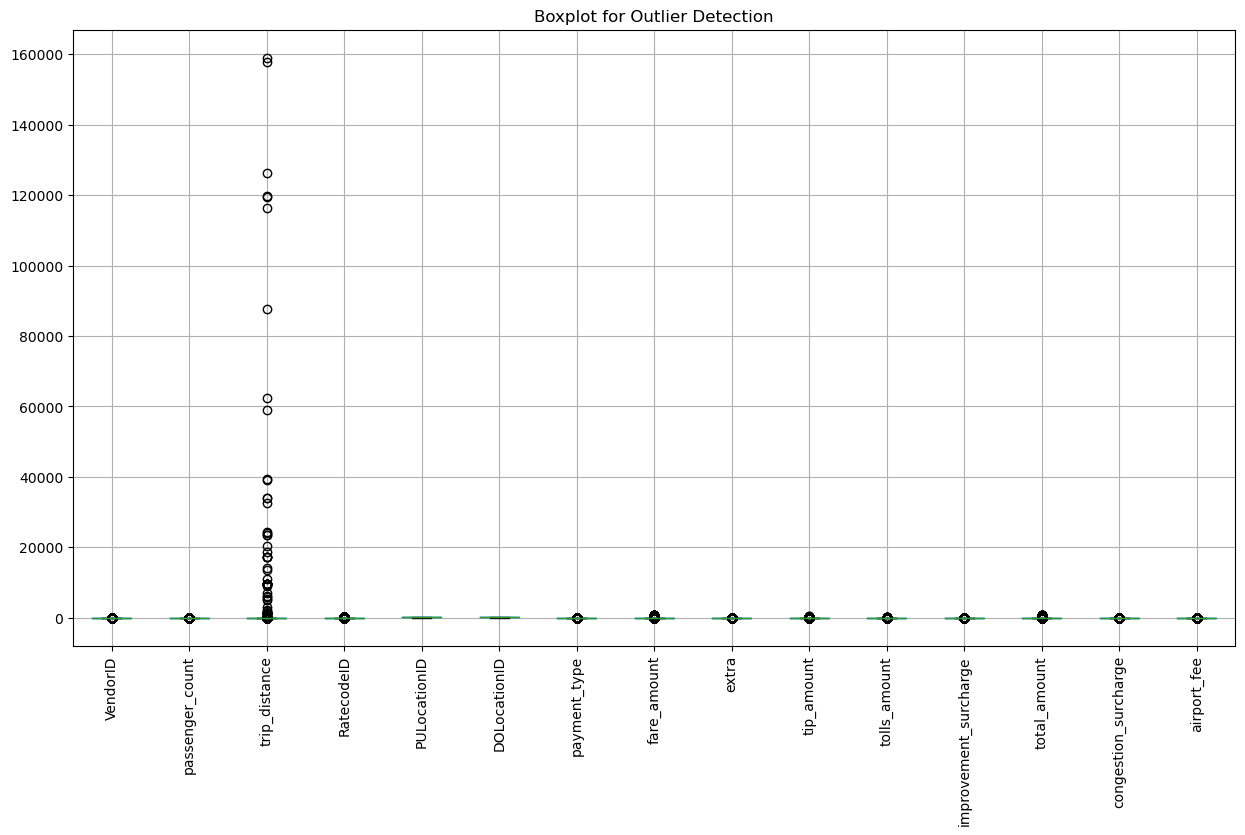

Negative Fare Amounts:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []
Zero Passenger Count:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
45              1  2023-01-01 00:23:26   2023-01-01 00:44:15              0.0   
284             1  2023-01-01 01:55:55   2023-01-01 02:12:22              0.0   
393             1  2023-01-01 01:34:06   2023-01-01 02:00:53              0.0   
454             1  2023-01-01 01:55:13   2023-01-01 02:14:25              0.0   
492             1  2023-01-01 01:33:42   2023-01-01 02:00:22              0.0   
...           ...                  ...                   ...              ...   
2185488         1  2023-12-30 18:13:57   2023-12-30 18:30:59       

In [42]:
# Describe the data and check if there are any potential outliers present
df.describe()

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numerical column
plt.figure(figsize=(15, 8))
df[num_cols].boxplot(rot=90)  # Rotate labels for readability
plt.title("Boxplot for Outlier Detection")
plt.show()

# Check for potential out of place values in various columns

print("Negative Fare Amounts:")
print(df[df['fare_amount'] < 0])

print("Zero Passenger Count:")
print(df[df['passenger_count'] == 0])

print("Unrealistic Trip Distances (e.g., greater than 100 miles):")
print(df[df['trip_distance'] > 100])

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [44]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
df['passenger_count'].value_counts()

passenger_count
1.0    1657057
2.0     324798
3.0      80575
4.0      45023
0.0      33024
5.0      27252
6.0      18113
Name: count, dtype: int64

In [46]:
# Continue with outlier handling

df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]
print(df.describe())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.110775e+06                     2110775                     2110775   
mean   1.741806e+00  2023-06-29 18:44:26.857689  2023-06-29 19:01:37.419837   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-03-31 17:01:01  2023-03-31 17:19:54.500000   
50%    2.000000e+00         2023-06-23 12:54:20         2023-06-23 13:13:03   
75%    2.000000e+00         2023-10-03 16:00:25  2023-10-03 16:18:44.500000   
max    2.000000e+00         2023-12-31 23:58:50         2024-01-01 00:29:11   
std    4.376412e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.110775e+06   2.110775e+06  2.110775e+06  2.110775e+06   
mean      1.373095e+00   3.503570e+00  1.596322e+00  1.646527e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

In [48]:
# Do any columns need standardising?
cols_to_standardize = ['trip_distance', 'fare_amount', 'total_amount']

# Applying standardization
for col in cols_to_standardize:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
df[cols_to_standardize].agg(['mean', 'std'])

trip_distance   fare_amount  total_amount
mean  -2.126941e-16  2.464038e-16 -9.921055e-17
std    1.000000e+00  1.000000e+00  1.000000e+00

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [50]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

Answer: These are Numerical


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

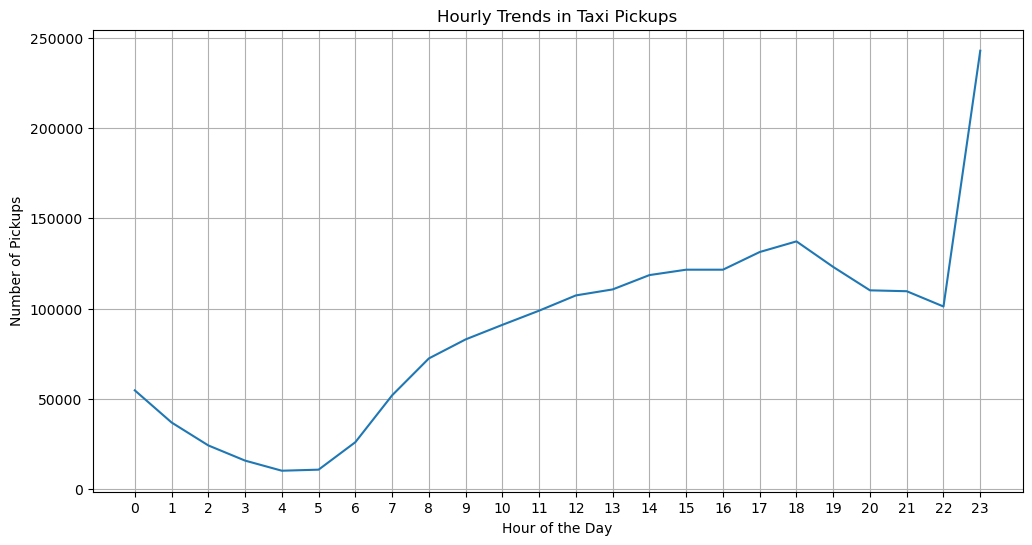

In [52]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x=df['pickup_hour'].value_counts().index, y=df['pickup_hour'].value_counts().values)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in Taxi Pickups")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

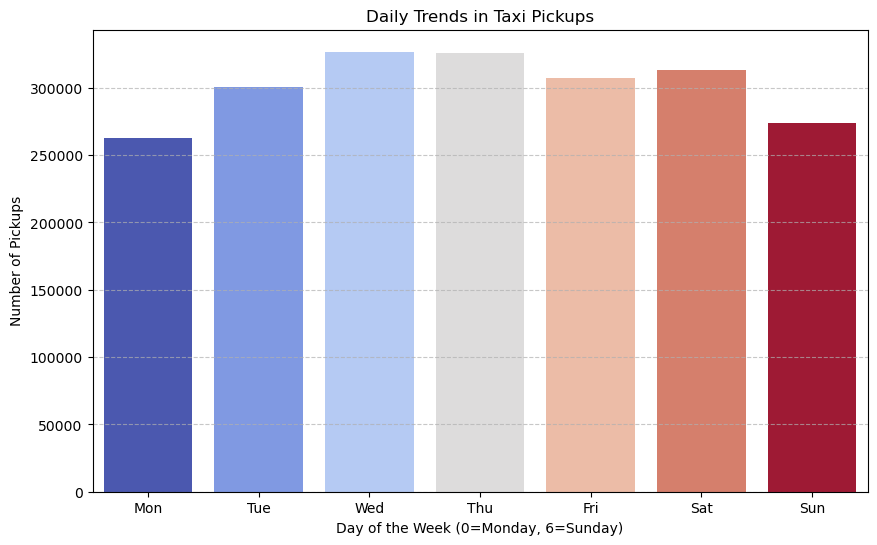

In [56]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

plt.figure(figsize=(10, 6))
sns.countplot(x="pickup_day", hue="pickup_day", data=df, palette="coolwarm", legend=False)

plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in Taxi Pickups")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

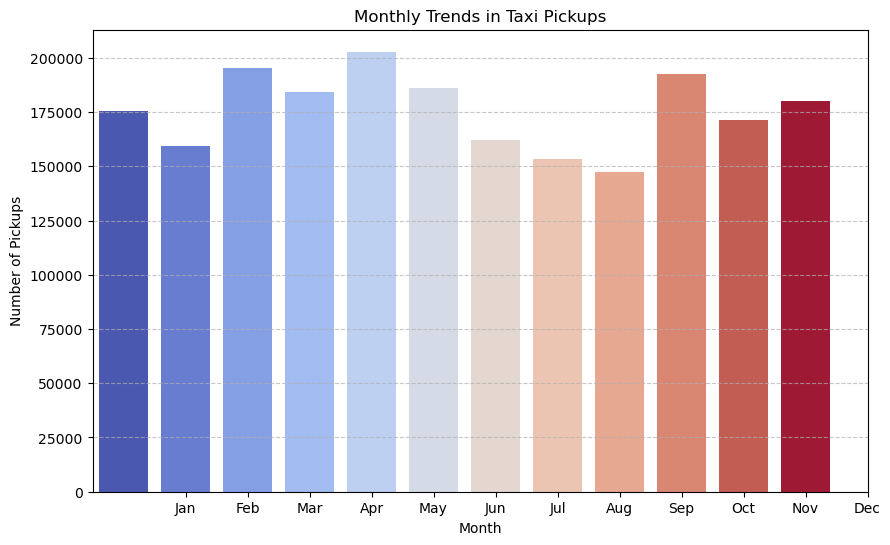

In [58]:
# Show the monthly trends in pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x="pickup_month", hue="pickup_month", data=df, palette="coolwarm", legend=False)

plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in Taxi Pickups")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [60]:
# Analyse the above parameters
params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Count of zero and negative values for each column
for col in params:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}:")
    print(f"Zero values: {zero_count}")
    print(f"Negative values: {negative_count}\n")

fare_amount:
Zero values: 0
Negative values: 1506039

tip_amount:
Zero values: 487438
Negative values: 0

total_amount:
Zero values: 0
Negative values: 1518957

trip_distance:
Zero values: 0
Negative values: 1590218



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [62]:
# Create a df with non zero entries for the selected parameters.
cols_to_filter = [
    'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]

df_non_zero = df.copy()
for col in cols_to_filter:
    df_non_zero = df_non_zero[df_non_zero[col] != 0]

(df_non_zero[cols_to_filter] == 0).sum()

fare_amount              0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

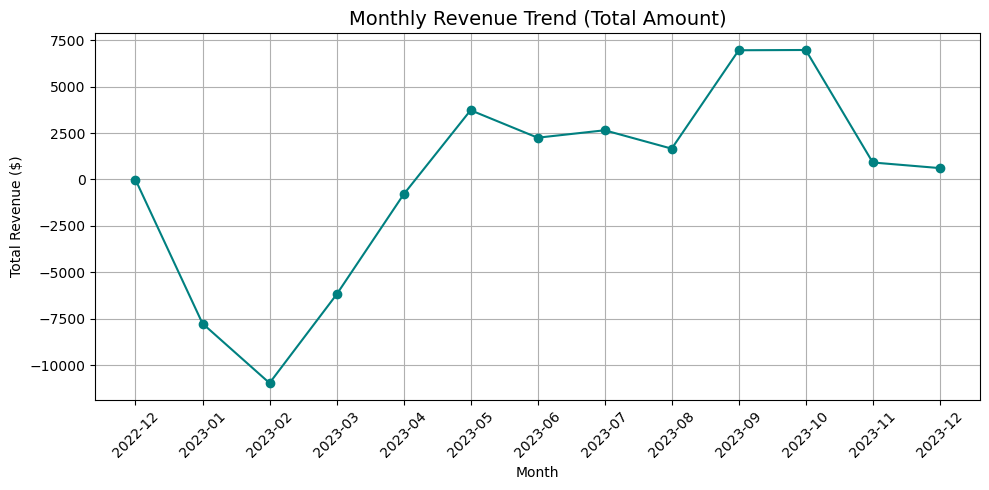

In [64]:
# Group data by month and analyse monthly revenue
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M').astype(str)

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()

monthly_revenue.columns = ['Month', 'Total_Revenue']

monthly_revenue = monthly_revenue.sort_values('Month')

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['Month'], monthly_revenue['Total_Revenue'], marker='o', color='teal')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend (Total Amount)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [66]:
# Calculate proportion of each quarter
df['pickup_date'] = pd.to_datetime(df['pickup_date'])

df['quarter'] = df['pickup_date'].dt.to_period('Q')

quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['Revenue_Proportion (%)'] = (quarterly_revenue['total_amount'] / total_revenue) * 100

print(quarterly_revenue)


  quarter  total_amount  Revenue_Proportion (%)
0  2022Q4    -12.831317            5.782042e+12
1  2023Q1 -24930.730287            1.123427e+16
2  2023Q2   5171.887017           -2.330553e+15
3  2023Q3  11270.116019           -5.078534e+15
4  2023Q4   8501.558567           -3.830968e+15


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

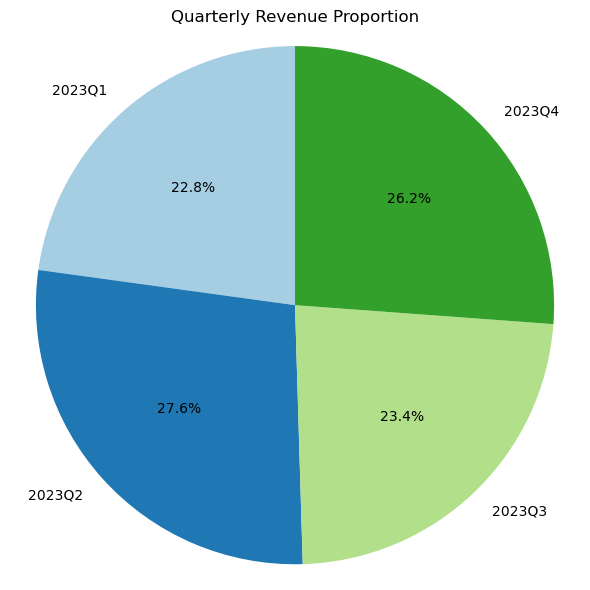

In [68]:
# Show how trip fare is affected by distance
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df = df[df['total_amount'] >= 0]

df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q').astype(str)

quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum().reset_index()

total_revenue = quarterly_revenue['total_amount'].sum()

quarterly_revenue['revenue_proportion'] = (quarterly_revenue['total_amount'] / total_revenue) * 100

quarterly_revenue.columns = ['Quarter', 'Total_Revenue', 'Revenue_Proportion']

plt.figure(figsize=(6, 6))
plt.pie(
    quarterly_revenue['Revenue_Proportion'],
    labels=quarterly_revenue['Quarter'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Quarterly Revenue Proportion')
plt.axis('equal')
plt.tight_layout()
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Fare vs Trip Duration: 0.206
Fare vs Passenger Count: 0.060
Tip vs Trip Distance: 0.359


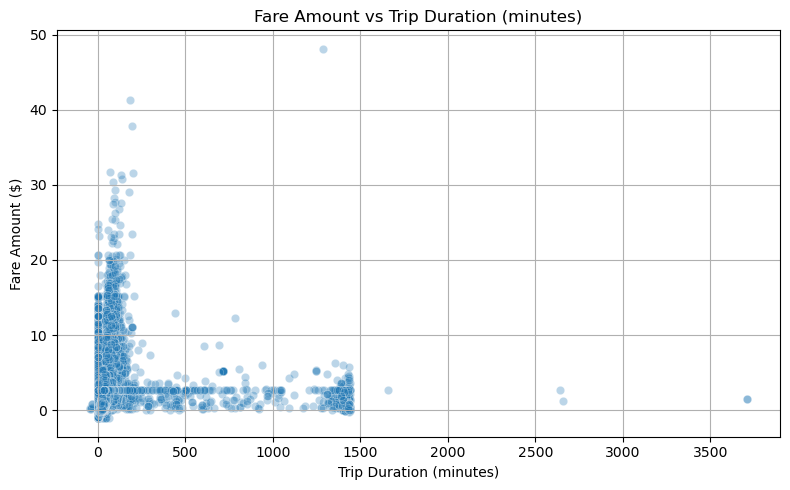

In [70]:
# Show relationship between fare and trip duration

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

correlations = {
    'Fare vs Trip Duration': df['fare_amount'].corr(df['trip_duration']),
    'Fare vs Passenger Count': df['fare_amount'].corr(df['passenger_count']),
    'Tip vs Trip Distance': df['tip_amount'].corr(df['trip_distance'])
}

for k, v in correlations.items():
    print(f"{k}: {v:.3f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs Trip Duration (minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

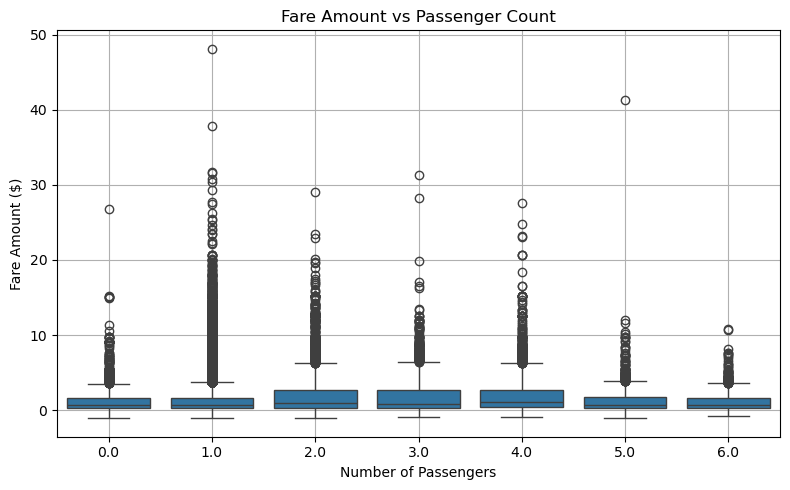

In [72]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

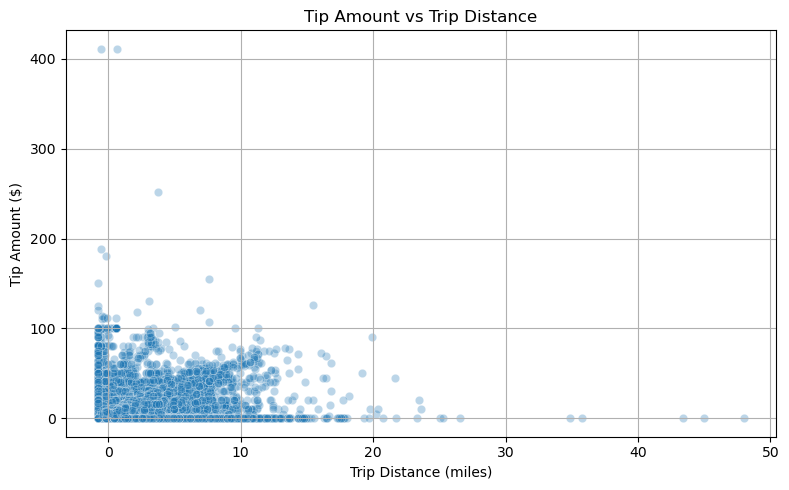

In [74]:
# Show relationship between tip and trip distance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1.0    502342
2.0     80503
3.0      2260
4.0      6713
Name: count, dtype: int64
payment_type
1.0    84.881163
2.0    13.602662
3.0     0.381874
4.0     1.134301
Name: proportion, dtype: float64


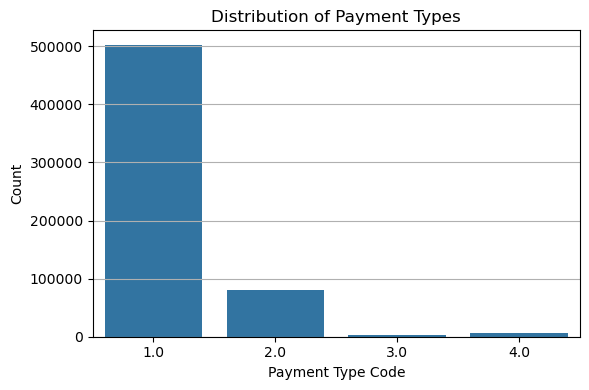

In [76]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = df['payment_type'].value_counts().sort_index()
print(payment_counts)
payment_percent = df['payment_type'].value_counts(normalize=True).sort_index() * 100
print(payment_percent)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='payment_type', order=payment_counts.index)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type Code')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [78]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [80]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("C:\\Users\\ASUS\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\taxi_zones\\taxi_zones.shp")
# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...  
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....  
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...  
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...  
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

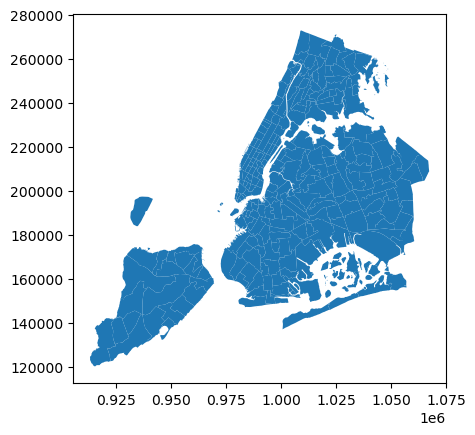

In [82]:
# print(zones.info())
print(zones.info())
# zones.plot()
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [84]:
# Merge zones and trip records using locationID and PULocationID
df = df.merge(
    zones[['LocationID', 'zone', 'borough']],
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
)

df.rename(columns={
    'zone': 'pickup_zone',
    'borough': 'pickup_borough'
}, inplace=True)

df[['PULocationID', 'LocationID', 'pickup_zone', 'pickup_borough']].head()



PULocationID  LocationID   pickup_zone pickup_borough
0            43        43.0  Central Park      Manhattan
1           132       132.0   JFK Airport         Queens
2           137       137.0      Kips Bay      Manhattan
3           264         NaN           NaN            NaN
4           249       249.0  West Village      Manhattan

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [86]:
# Group data by location and calculate the number of trips
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_trips']

dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_trips']

location_trip_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)

location_trip_counts['total_trips'] = location_trip_counts['pickup_trips'] + location_trip_counts['dropoff_trips']

location_trip_counts = location_trip_counts.sort_values(by='total_trips', ascending=False)

print(location_trip_counts.head())

df.columns


     LocationID  pickup_trips  dropoff_trips  total_trips
128         132      109934.0        20201.0     130135.0
134         138       74856.0        22754.0      97610.0
226         230       19064.0        19157.0      38221.0
157         161       19403.0        13653.0      33056.0
232         236       12008.0        13608.0      25616.0


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_date', 'pickup_hour',
       'pickup_day', 'pickup_month', 'quarter', 'pickup_quarter',
       'trip_duration', 'LocationID', 'pickup_zone', 'pickup_borough'],
      dtype='object')

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

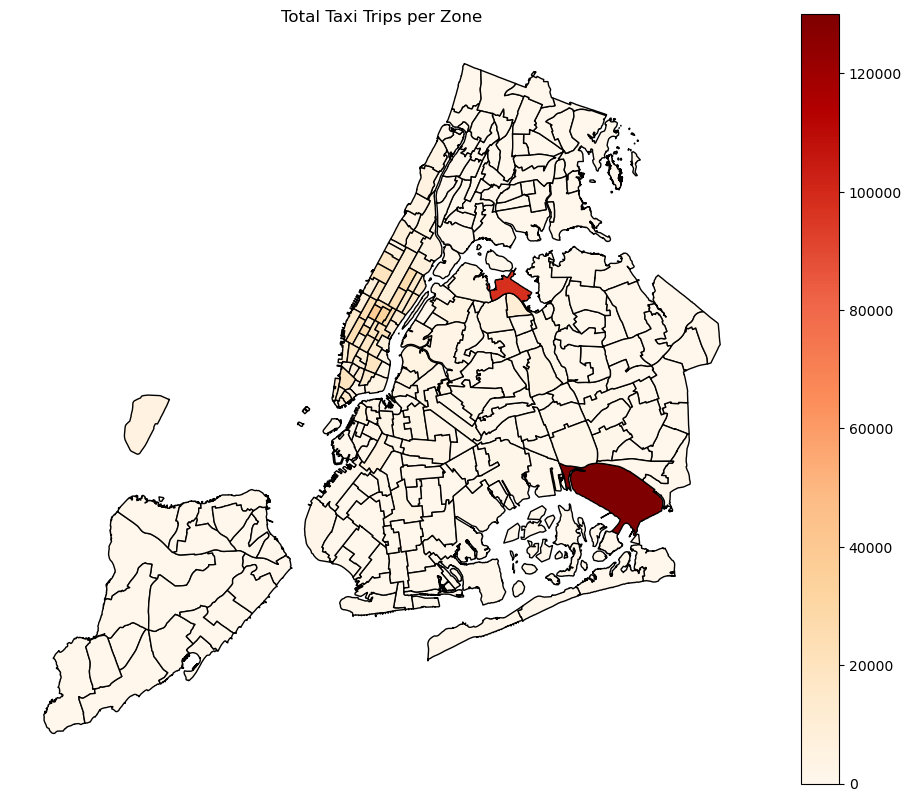

In [88]:
# Merge trip counts back to the zones GeoDataFrame
zones['LocationID'] = zones['LocationID'].astype(int)
location_trip_counts['LocationID'] = location_trip_counts['LocationID'].astype(int)

zones_merged = zones.merge(location_trip_counts, on='LocationID', how='left')

zones_merged['total_trips'] = zones_merged['total_trips'].fillna(0)

fig, ax = plt.subplots(figsize=(12, 10))
zones_merged.plot(column='total_trips', cmap='OrRd', legend=True, edgecolor='black', ax=ax)
plt.title('Total Taxi Trips per Zone')
plt.axis('off')
plt.show()


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

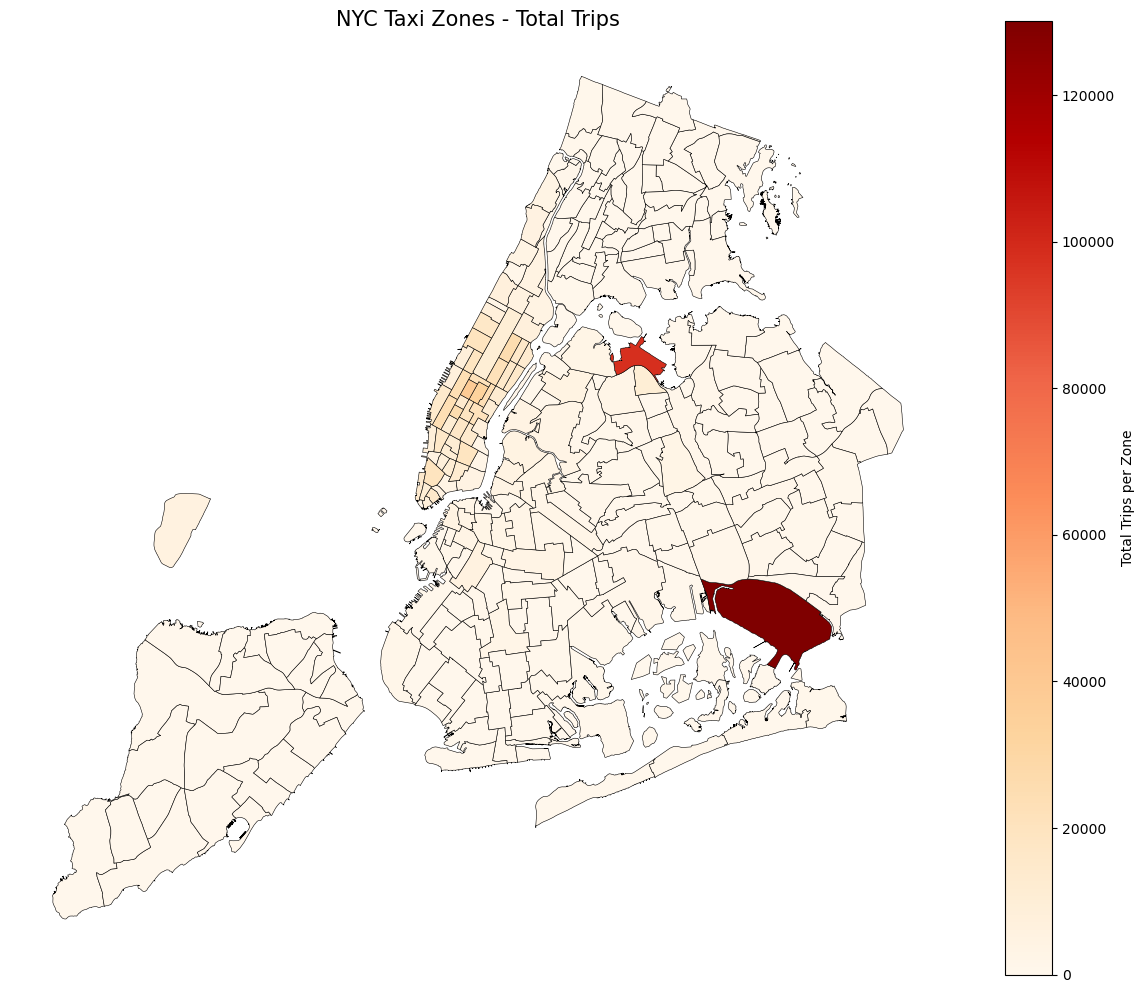

In [90]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones_merged.plot(
    column='total_trips',
    ax=ax,
    legend=True,
    cmap='OrRd',  # or use 'viridis', 'plasma', etc.
    legend_kwds={
        'label': "Total Trips per Zone",
        'orientation': "vertical"
    },
    edgecolor='black',
    linewidth=0.4
)


ax.set_title("NYC Taxi Zones - Total Trips", fontsize=15)
ax.axis('off')  # Hide axis ticks
plt.tight_layout()
plt.show()


In [94]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones_merged.sort_values(by='total_trips', ascending=False)

zones_sorted[['LocationID', 'zone', 'borough', 'total_trips']].head(10)


LocationID                          zone    borough  total_trips
131         132                   JFK Airport     Queens     130135.0
137         138             LaGuardia Airport     Queens      97610.0
229         230     Times Sq/Theatre District  Manhattan      38221.0
160         161                Midtown Center  Manhattan      33056.0
235         236         Upper East Side North  Manhattan      25616.0
185         186  Penn Station/Madison Sq West  Manhattan      25423.0
47           48                  Clinton East  Manhattan      24191.0
67           68                  East Chelsea  Manhattan      24126.0
161         162                  Midtown East  Manhattan      23694.0
236         237         Upper East Side South  Manhattan      22159.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [566]:
# Find routes which have the slowest speeds at different times of the day
df_filtered = df[(df['trip_duration'] > 0) & (df['trip_distance'] > 0)]

grouped = df_filtered.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_duration=('trip_duration', 'mean'),        # in minutes
    avg_distance=('trip_distance', 'mean')         # in miles
).reset_index()

grouped['avg_speed_mph'] = (grouped['avg_distance'] / grouped['avg_duration']) * 60

slowest_routes_by_hour = grouped.sort_values(by='avg_speed_mph').groupby('pickup_hour').first().reset_index()

print(slowest_routes_by_hour[['pickup_hour', 'PULocationID', 'DOLocationID', 'avg_speed_mph']])


    pickup_hour  PULocationID  DOLocationID  avg_speed_mph
0             0           163           114       0.003926
1             1           231           230       0.016961
2             2           246           107       0.004482
3             3           164           263       0.005416
4             4           144           246       0.027608
5             5           249            50       0.005812
6             6            11           221       0.021467
7             7           107           263       0.004516
8             8           113            13       0.005014
9             9           232           164       0.003278
10           10           246           246       0.002928
11           11           186           113       0.000971
12           12            48           237       0.002676
13           13           246           229       0.003178
14           14           148           100       0.002952
15           15           162            90       0.0025

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 23:00 with 78505 trips.


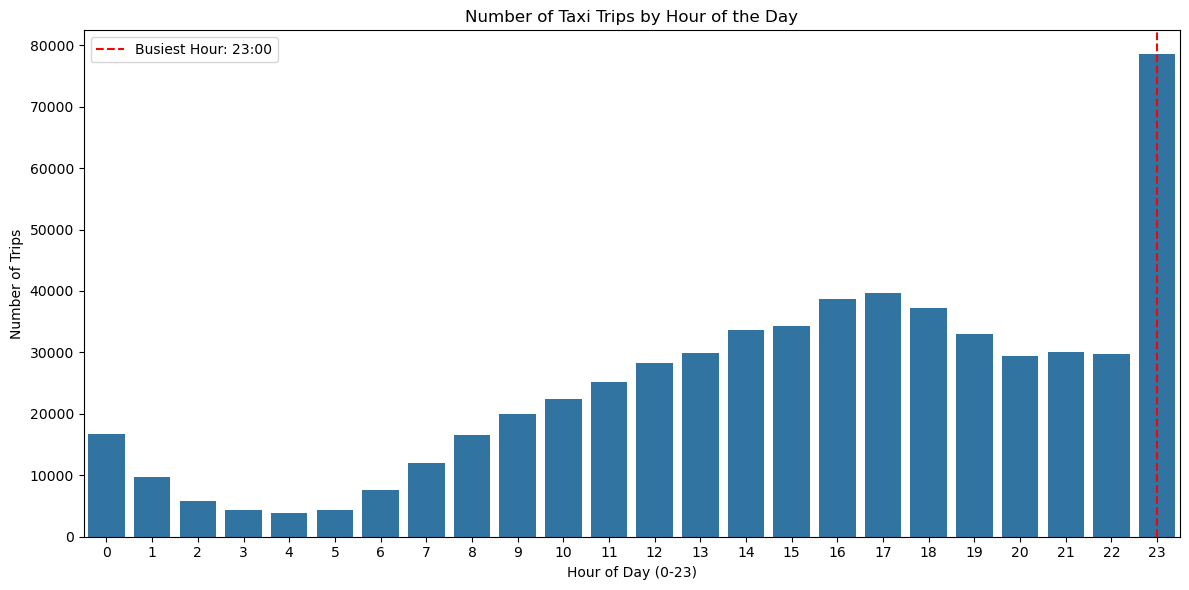

In [570]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = df['pickup_hour'].value_counts().sort_index()

busiest_hour = hourly_trips.idxmax()
busiest_count = hourly_trips.max()

print(f"Busiest hour: {busiest_hour}:00 with {busiest_count} trips.")

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values)
plt.title('Number of Taxi Trips by Hour of the Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Trips')
plt.axvline(busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}:00')
plt.legend()
plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [572]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.01  # Change this if you used a different fraction

hourly_trips = df['pickup_hour'].value_counts().sort_values(ascending=False)

busiest_hours = hourly_trips.head(5)

scaled_busiest_hours = (busiest_hours / sample_fraction).astype(int)

print("Actual number of trips in the five busiest hours:")
print(scaled_busiest_hours)



Actual number of trips in the five busiest hours:
pickup_hour
23    7850500
17    3963600
16    3869600
18    3715700
15    3437500
Name: count, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

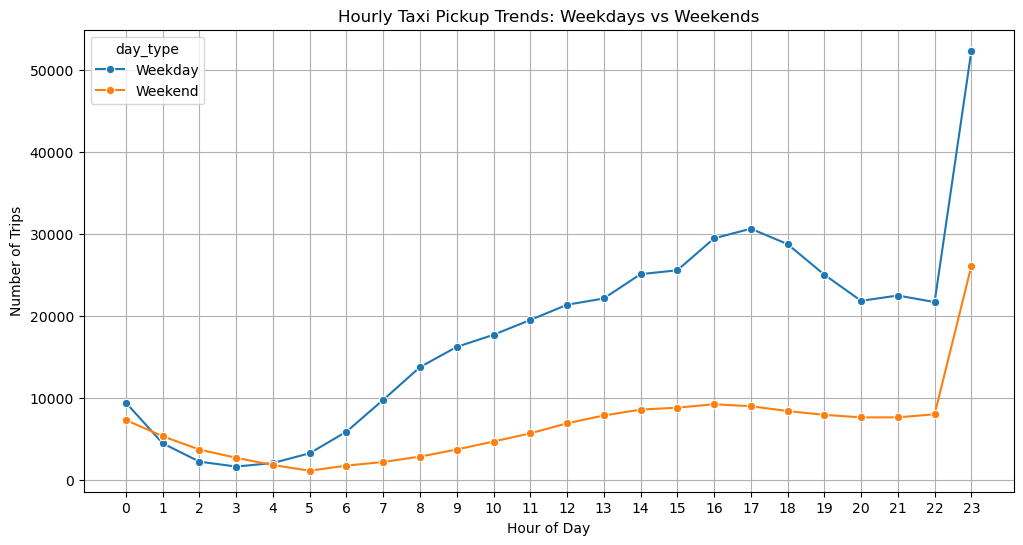

In [574]:
# Compare traffic trends for the week days and weekends
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

df['day_type'] = df['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

hourly_comparison = df.groupby(['pickup_hour', 'day_type']).size().reset_index(name='num_trips')

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_comparison, x='pickup_hour', y='num_trips', hue='day_type', marker='o')
plt.title('Hourly Taxi Pickup Trends: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

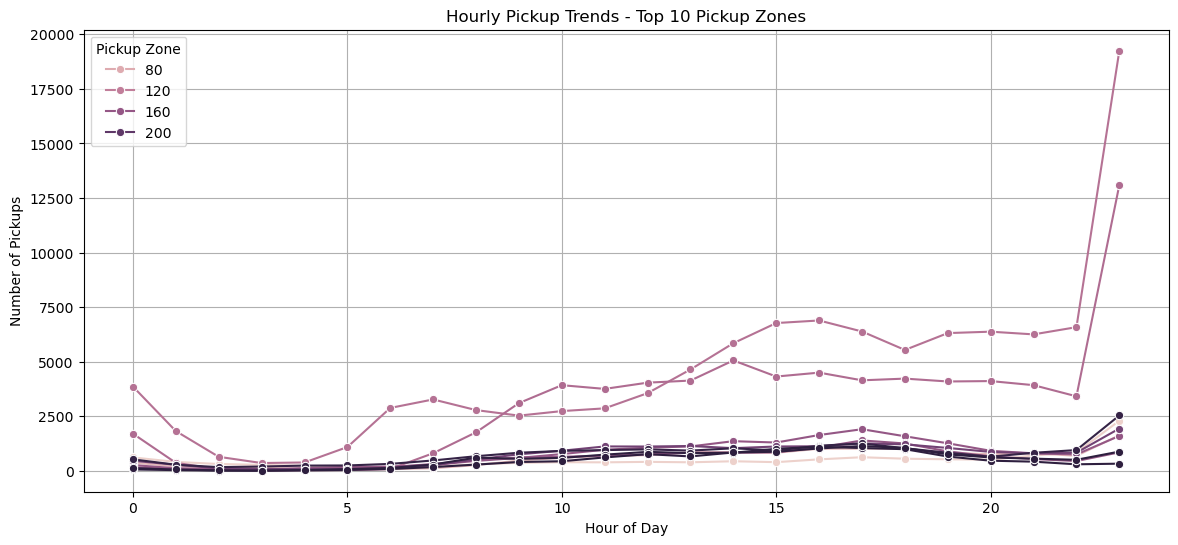

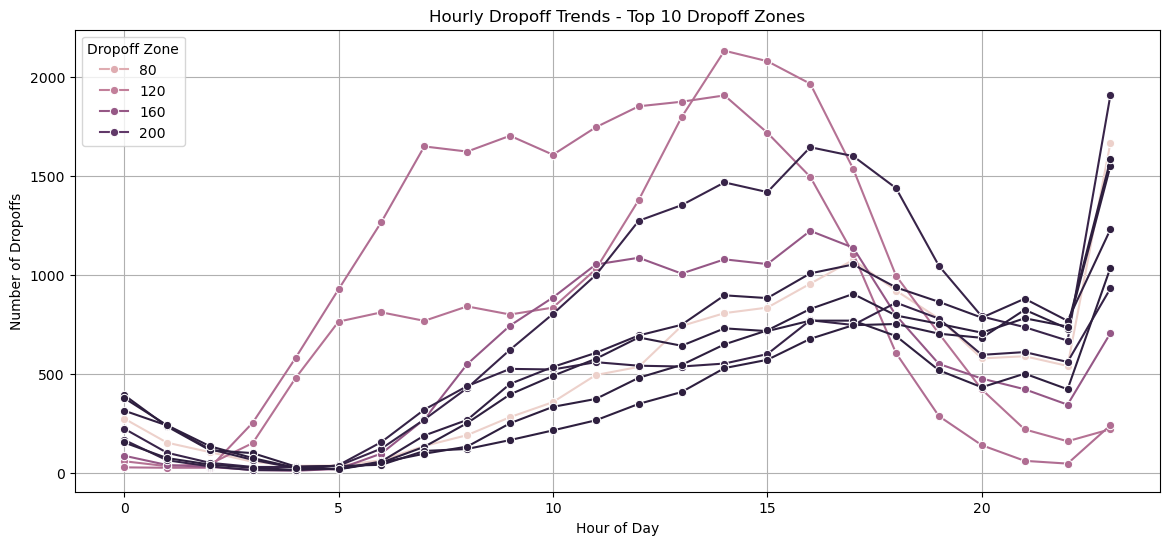

In [576]:
# Find top 10 pickup and dropoff zones
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

top_pickup_zones = df['PULocationID'].value_counts().head(10).index

top_dropoff_zones = df['DOLocationID'].value_counts().head(10).index

pickup_trends = df[df['PULocationID'].isin(top_pickup_zones)]
pickup_hourly = pickup_trends.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='num_pickups')

dropoff_trends = df[df['DOLocationID'].isin(top_dropoff_zones)]
dropoff_hourly = dropoff_trends.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='num_dropoffs')

plt.figure(figsize=(14, 6))
sns.lineplot(data=pickup_hourly, x='pickup_hour', y='num_pickups', hue='PULocationID', marker='o')
plt.title('Hourly Pickup Trends - Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Pickup Zone')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_hourly, x='pickup_hour', y='num_dropoffs', hue='DOLocationID', marker='o')
plt.title('Hourly Dropoff Trends - Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend(title='Dropoff Zone')
plt.grid(True)
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [578]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df['PULocationID'].value_counts().rename('pickups')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoffs')

zone_ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

zone_ratios['pickup_drop_ratio'] = zone_ratios['pickups'] / zone_ratios['dropoffs'].replace(0, 1)

top10_ratio = zone_ratios.sort_values(by='pickup_drop_ratio', ascending=False).head(10)
bottom10_ratio = zone_ratios.sort_values(by='pickup_drop_ratio', ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top10_ratio[['pickups', 'dropoffs', 'pickup_drop_ratio']])

print("\n Bottom 10 Pickup/Dropoff Ratios:")
print(bottom10_ratio[['pickups', 'dropoffs', 'pickup_drop_ratio']])



Top 10 Pickup/Dropoff Ratios:
      pickups  dropoffs  pickup_drop_ratio
70     9416.0     740.0          12.724324
132  109636.0   20203.0           5.426719
138   74758.0   22751.0           3.285921
186   18292.0    7130.0           2.565498
249   11030.0    5414.0           2.037311
114    7063.0    3983.0           1.773286
234   10670.0    6581.0           1.621334
68    14268.0    9810.0           1.454434
161   19400.0   13654.0           1.420829
162   13863.0    9828.0           1.410562

 Bottom 10 Pickup/Dropoff Ratios:
     pickups  dropoffs  pickup_drop_ratio
2        0.0       2.0                0.0
204      0.0       7.0                0.0
30       0.0      16.0                0.0
59       0.0      16.0                0.0
115      0.0      21.0                0.0
176      0.0      23.0                0.0
111      0.0      34.0                0.0
58       0.0      44.0                0.0
118      0.0      48.0                0.0
99       0.0       3.0                0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [580]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

night_hours = [23, 0, 1, 2, 3, 4, 5]
night_pickups = df[df['pickup_hour'].isin(night_hours)]
night_dropoffs = df[df['dropoff_hour'].isin(night_hours)]

top_night_pickup_zones = night_pickups['PULocationID'].value_counts().head(10)

top_night_dropoff_zones = night_dropoffs['DOLocationID'].value_counts().head(10)

print("Top 10 Pickup Zones During Night Hours (11PM–5AM):")
print(top_night_pickup_zones)

print("\n Top 10 Dropoff Zones During Night Hours (11PM–5AM):")
print(top_night_dropoff_zones)



Top 10 Pickup Zones During Night Hours (11PM–5AM):
PULocationID
132    27406
138    15330
249     4944
79      4884
48      4287
230     4208
114     3515
148     3255
186     3033
68      2654
Name: count, dtype: int64

 Top 10 Dropoff Zones During Night Hours (11PM–5AM):
DOLocationID
263    3037
265    2799
239    2758
238    2729
230    2699
48     2571
262    2411
87     2408
141    2351
181    2350
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

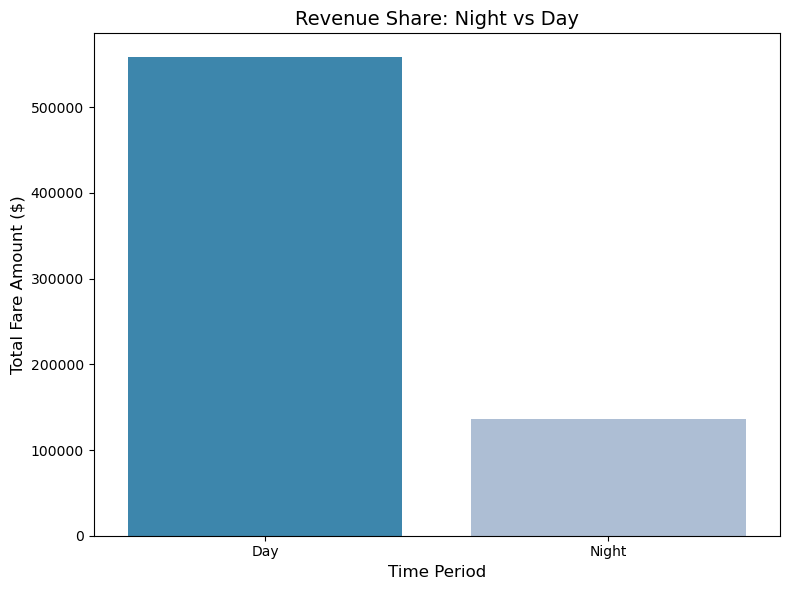

In [100]:
# Filter for night hours (11 PM to 5 AM)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['hour'] = df['tpep_pickup_datetime'].dt.hour

df['time_period'] = 'Day'
df.loc[(df['hour'] >= 23) | (df['hour'] < 5), 'time_period'] = 'Night'

revenue_share = df.groupby('time_period')['fare_amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=revenue_share, x='time_period', y='fare_amount', hue='time_period', dodge=False, palette=['#2b8cbe', '#a6bddb'], legend=False)

plt.title('Revenue Share: Night vs Day', fontsize=14)
plt.ylabel('Total Fare Amount ($)', fontsize=12)
plt.xlabel('Time Period', fontsize=12)
plt.tight_layout()
plt.show()



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [582]:
# Analyse the fare per mile per passenger for different passenger counts

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

night_hours = [23, 0, 1, 2, 3, 4, 5]
day_hours = list(range(6, 23))

night_trips = df[df['pickup_hour'].isin(night_hours)]
day_trips = df[df['pickup_hour'].isin(day_hours)]

night_revenue = night_trips['total_amount'].sum()
day_revenue = day_trips['total_amount'].sum()
total_revenue = night_revenue + day_revenue

night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share (11PM–5AM): {night_share:.2f}%")
print(f"Daytime Revenue Share (6AM–10PM): {day_share:.2f}%")


Nighttime Revenue Share (11PM–5AM): 20.09%
Daytime Revenue Share (6AM–10PM): 79.91%


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

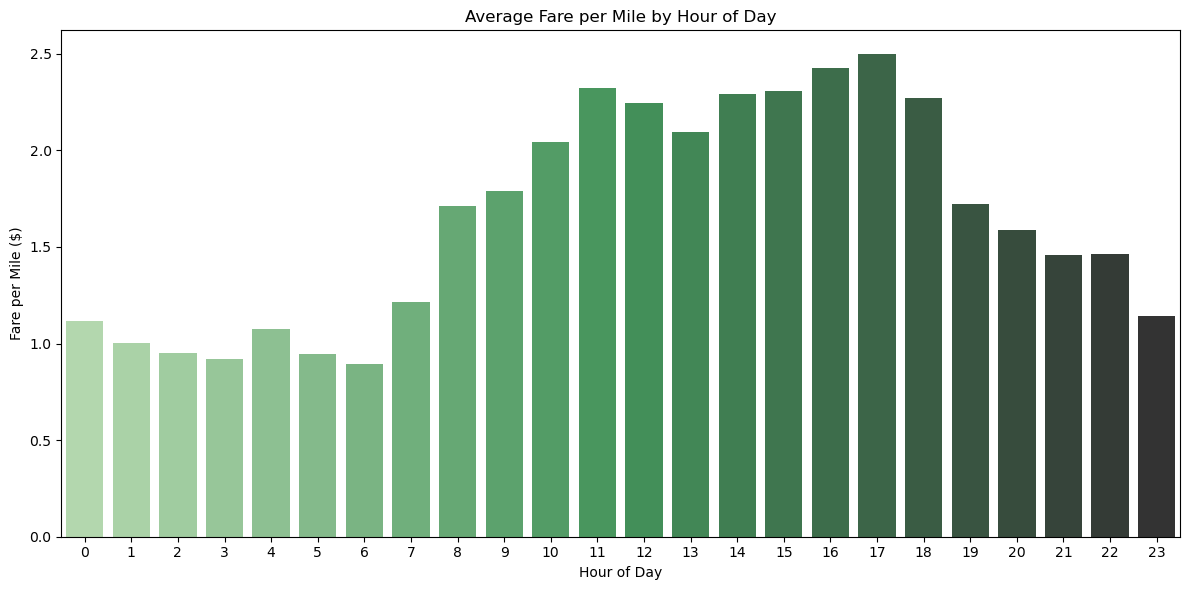

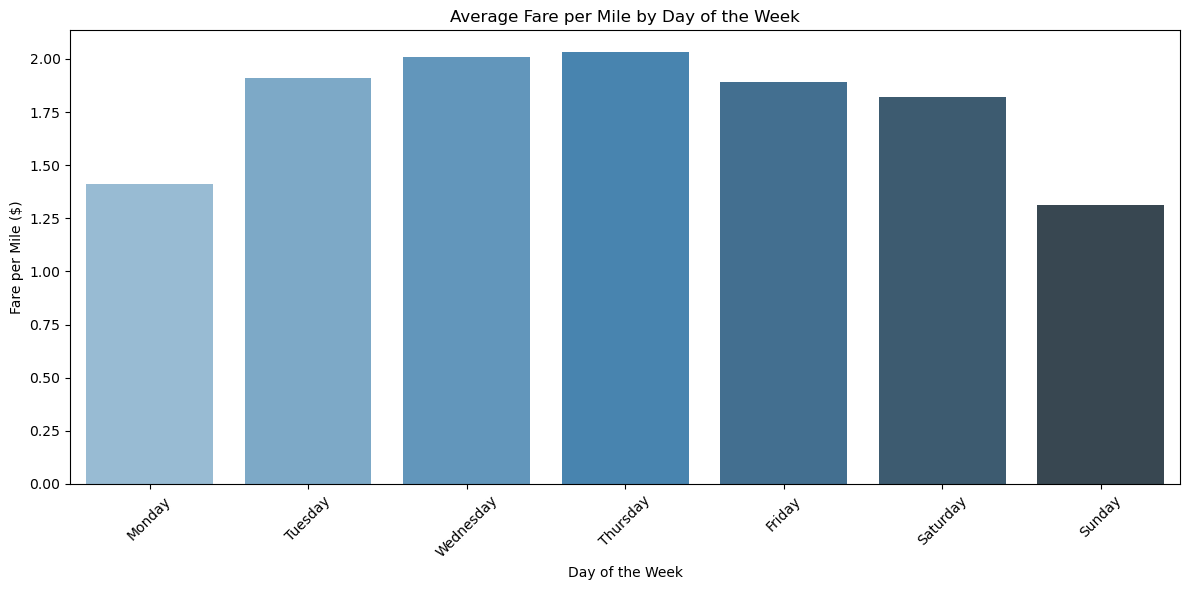

In [598]:
# Compare the average fare per mile for different days and for different times of the day
df_filtered = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()

df_filtered['hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['day'] = df_filtered['tpep_pickup_datetime'].dt.day_name()

df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

# --- Average Fare per Mile by Hour ---
avg_fare_hour = df_filtered.groupby('hour')['fare_per_mile'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_fare_hour.index, y=avg_fare_hour.values,
            hue=avg_fare_hour.index, palette="Greens_d", legend=False)
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Average Fare per Mile by Day ---
avg_fare_day = df_filtered.groupby('day')['fare_per_mile'].mean()


days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_fare_day = avg_fare_day.loc[days_order]

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_fare_day.index, y=avg_fare_day.values,
            hue=avg_fare_day.index, palette="Blues_d", legend=False)
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

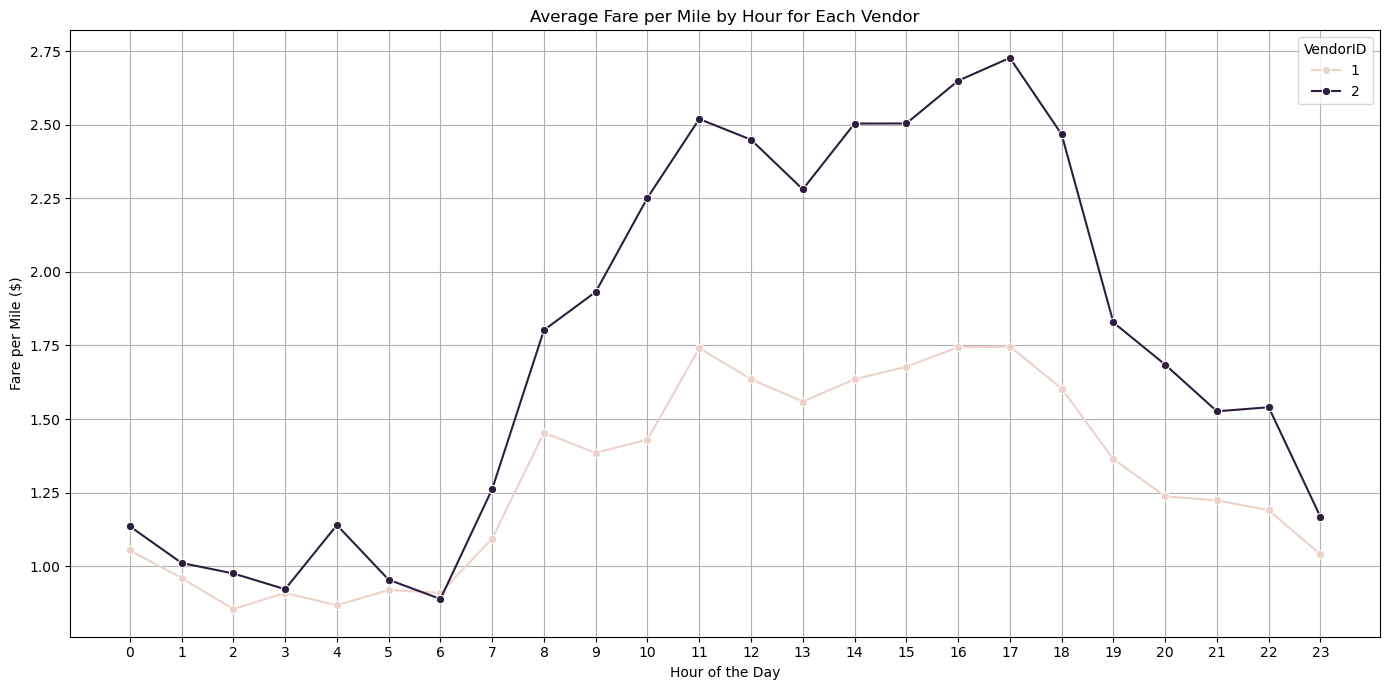

In [600]:
# Compare fare per mile for different vendors

df_filtered = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()

df_filtered['hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

vendor_hour_fare = df_filtered.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=vendor_hour_fare, x='hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title('Average Fare per Mile by Hour for Each Vendor')
plt.xlabel('Hour of the Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


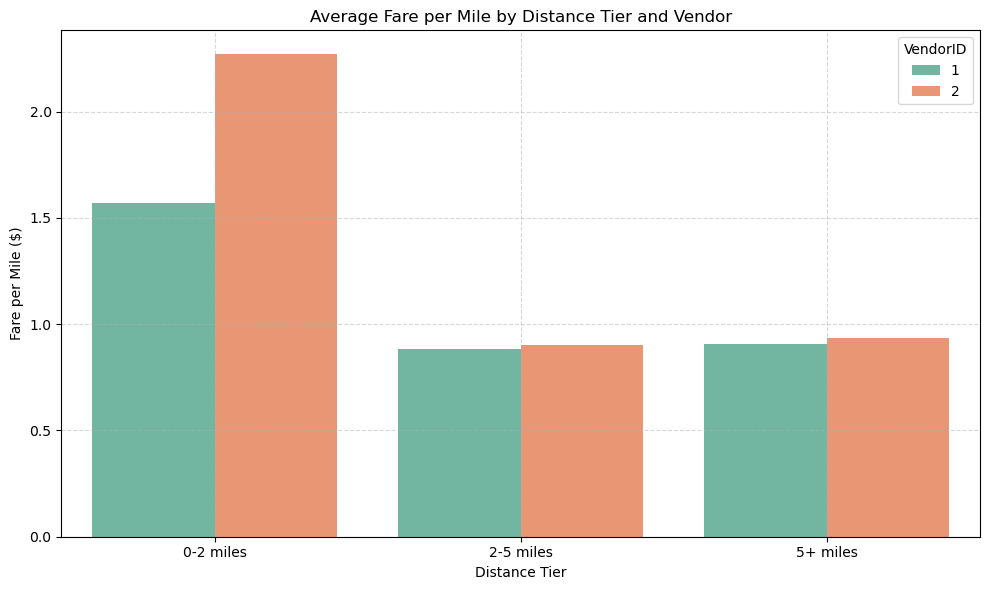

In [604]:
# Defining distance tiers
df_filtered = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()

df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

def classify_distance(dist):
    if dist <= 2:
        return '0-2 miles'
    elif dist <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(classify_distance)

tiered_fares = df_filtered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

tiered_fares['distance_tier'] = pd.Categorical(
    tiered_fares['distance_tier'],
    categories=['0-2 miles', '2-5 miles', '5+ miles'],
    ordered=True
)

plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fares, x='distance_tier', y='fare_per_mile', hue='VendorID', palette='Set2')
plt.title('Average Fare per Mile by Distance Tier and Vendor')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

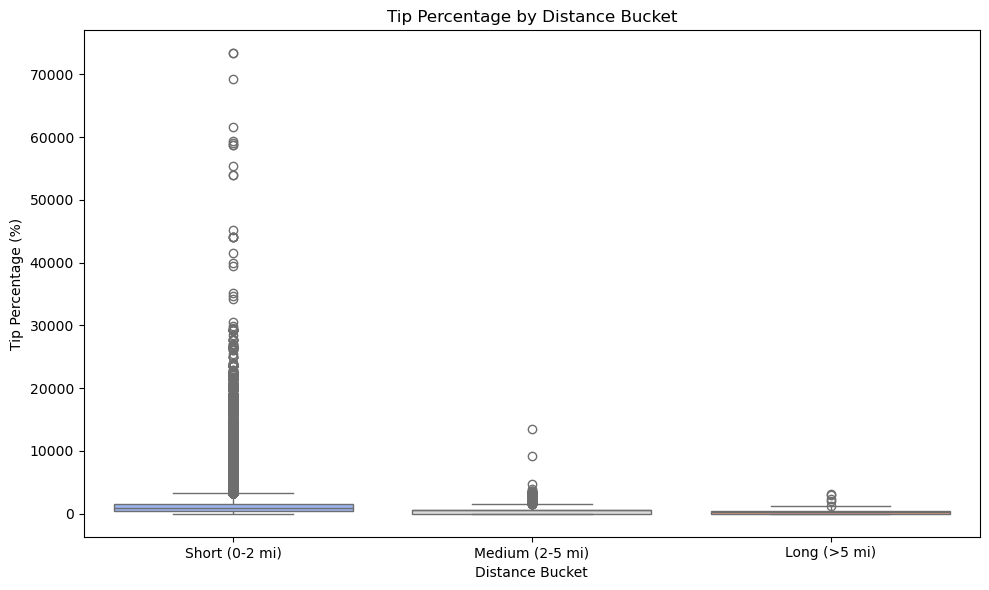

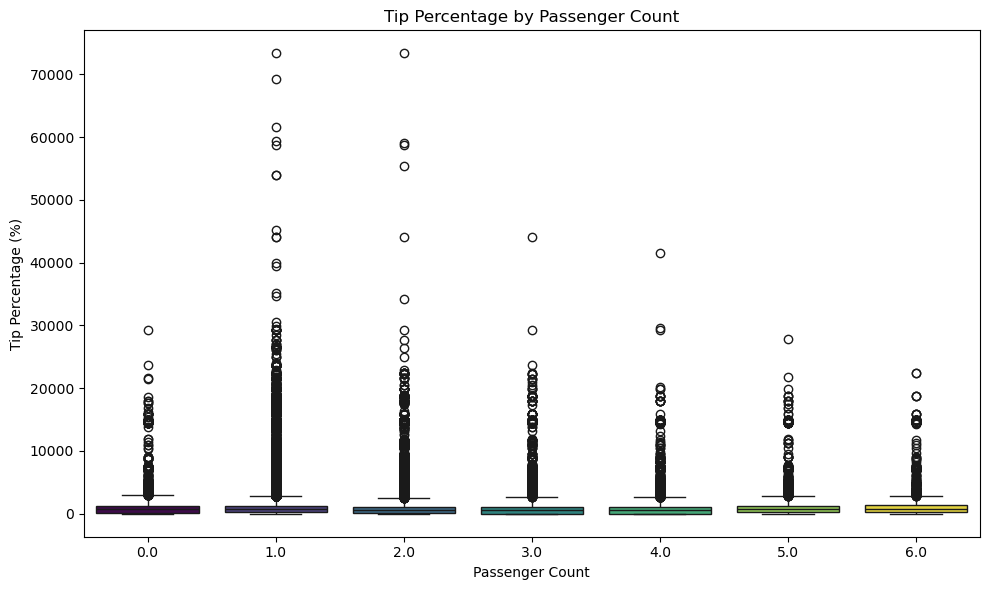

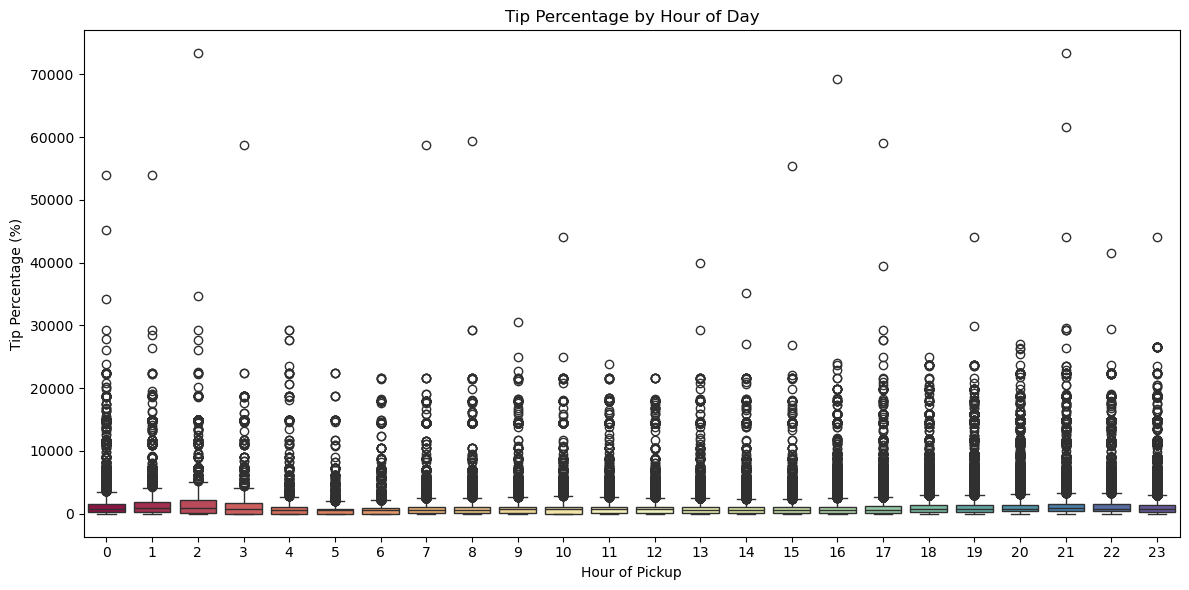

In [612]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_filtered = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()

df_filtered.loc[:, 'tip_percent'] = (df_filtered['tip_amount'] / df_filtered['fare_amount']) * 100

df_filtered.loc[:, 'hour'] = df_filtered['tpep_pickup_datetime'].dt.hour

bins = [0, 2, 5, df_filtered['trip_distance'].max()]
labels = ['Short (0-2 mi)', 'Medium (2-5 mi)', 'Long (>5 mi)']
df_filtered.loc[:, 'distance_bucket'] = pd.cut(df_filtered['trip_distance'], bins=bins, labels=labels)

# Plot 1: Tip % by Distance Bucket
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='distance_bucket', y='tip_percent', hue='distance_bucket', legend=False, palette='coolwarm')
plt.title('Tip Percentage by Distance Bucket')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Distance Bucket')
plt.tight_layout()
plt.show()

# Plot 2: Tip % by Passenger Count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='passenger_count', y='tip_percent', hue='passenger_count', legend=False, palette='viridis')
plt.title('Tip Percentage by Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Passenger Count')
plt.tight_layout()
plt.show()

# Plot 3: Tip % by Pickup Hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='hour', y='tip_percent', hue='hour', legend=False, palette='Spectral')
plt.title('Tip Percentage by Hour of Day')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Hour of Pickup')
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

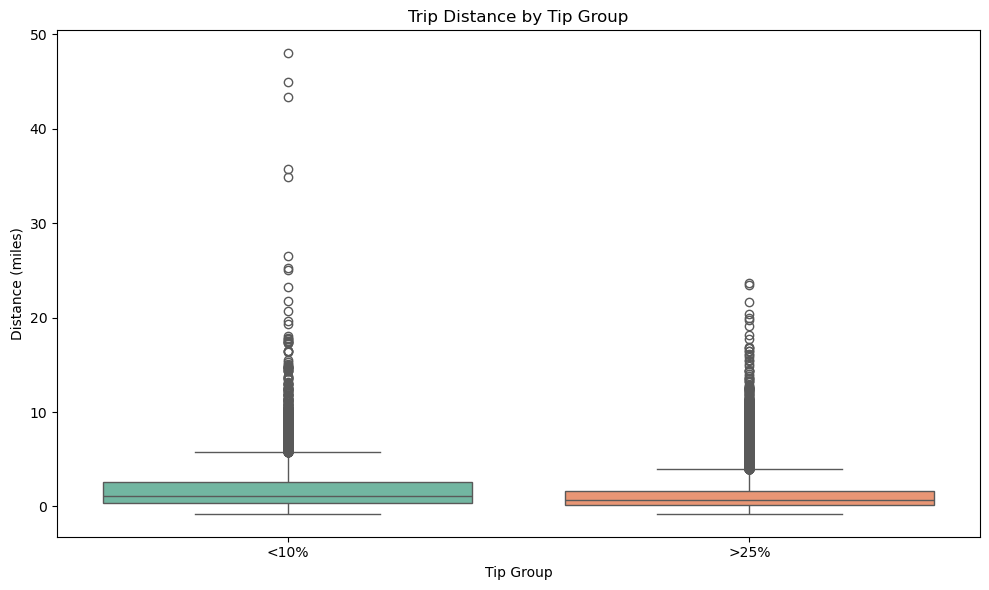

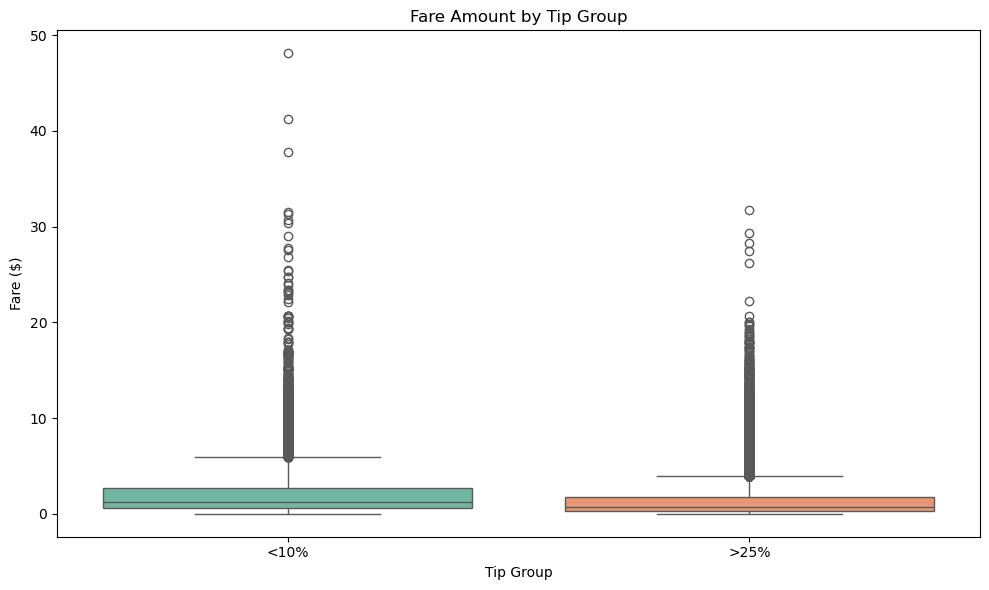

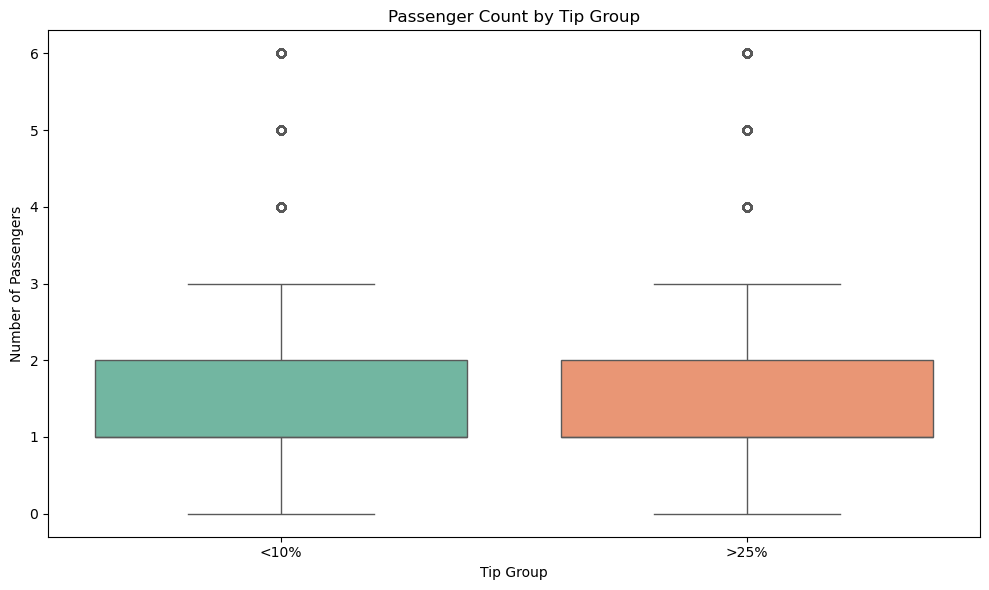

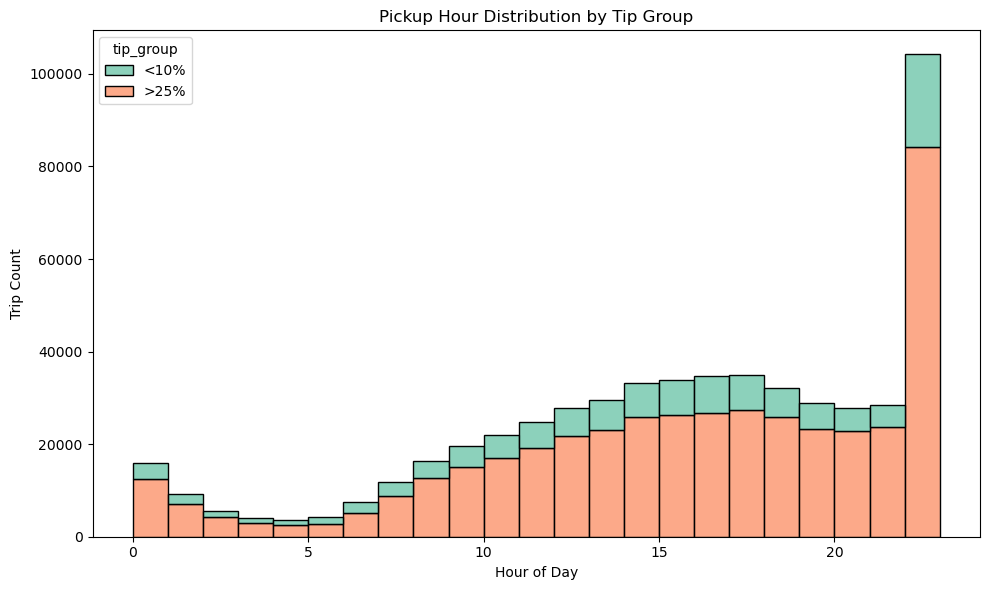

In [102]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Ensure datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filter out rows with zero or negative fare
df = df[df['fare_amount'] > 0].copy()

# Calculate tip percentage
df['tip_percent'] = (df['tip_amount'] / df['fare_amount']) * 100

# Extract hour of the day
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Define low and high tip groups
low_tip = df[df['tip_percent'] < 10].copy()
high_tip = df[df['tip_percent'] > 25].copy()

low_tip['tip_group'] = '<10%'
high_tip['tip_group'] = '>25%'

# Combine both groups
tip_comparison = pd.concat([low_tip, high_tip], ignore_index=True)

# Plot 1: Trip Distance
plt.figure(figsize=(10, 6))
sns.boxplot(data=tip_comparison, x='tip_group', y='trip_distance', hue='tip_group', dodge=False, palette='Set2', legend=False)
plt.title('Trip Distance by Tip Group')
plt.ylabel('Distance (miles)')
plt.xlabel('Tip Group')
plt.tight_layout()
plt.show()

# Plot 2: Fare Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=tip_comparison, x='tip_group', y='fare_amount', hue='tip_group', dodge=False, palette='Set2', legend=False)
plt.title('Fare Amount by Tip Group')
plt.ylabel('Fare ($)')
plt.xlabel('Tip Group')
plt.tight_layout()
plt.show()

# Plot 3: Passenger Count
plt.figure(figsize=(10, 6))
sns.boxplot(data=tip_comparison, x='tip_group', y='passenger_count', hue='tip_group', dodge=False, palette='Set2', legend=False)
plt.title('Passenger Count by Tip Group')
plt.ylabel('Number of Passengers')
plt.xlabel('Tip Group')
plt.tight_layout()
plt.show()

# Plot 4: Hour of Pickup
plt.figure(figsize=(10, 6))
sns.histplot(data=tip_comparison, x='hour', hue='tip_group', multiple='stack', palette='Set2', binwidth=1)
plt.title('Pickup Hour Distribution by Tip Group')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

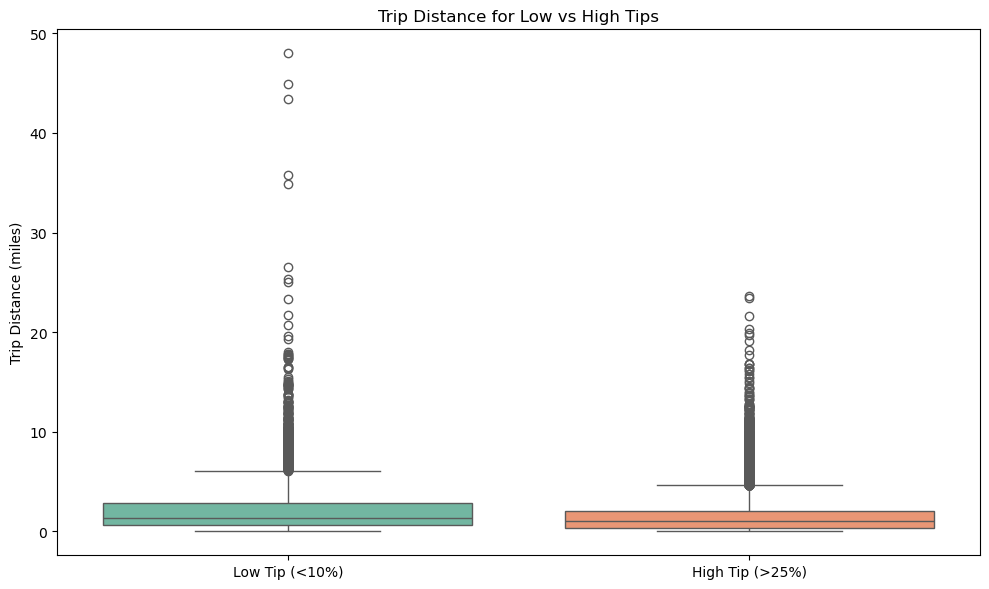

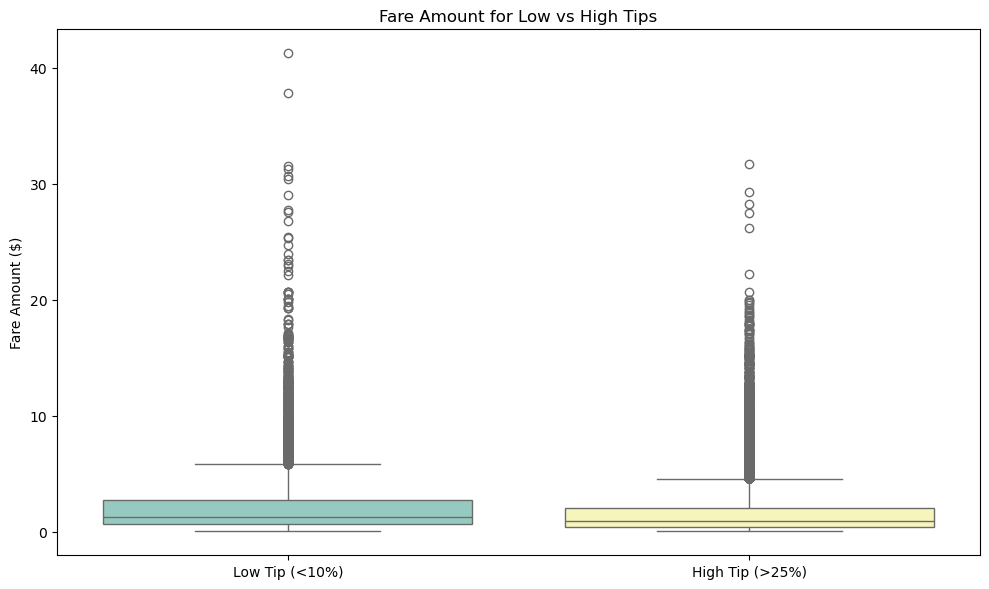

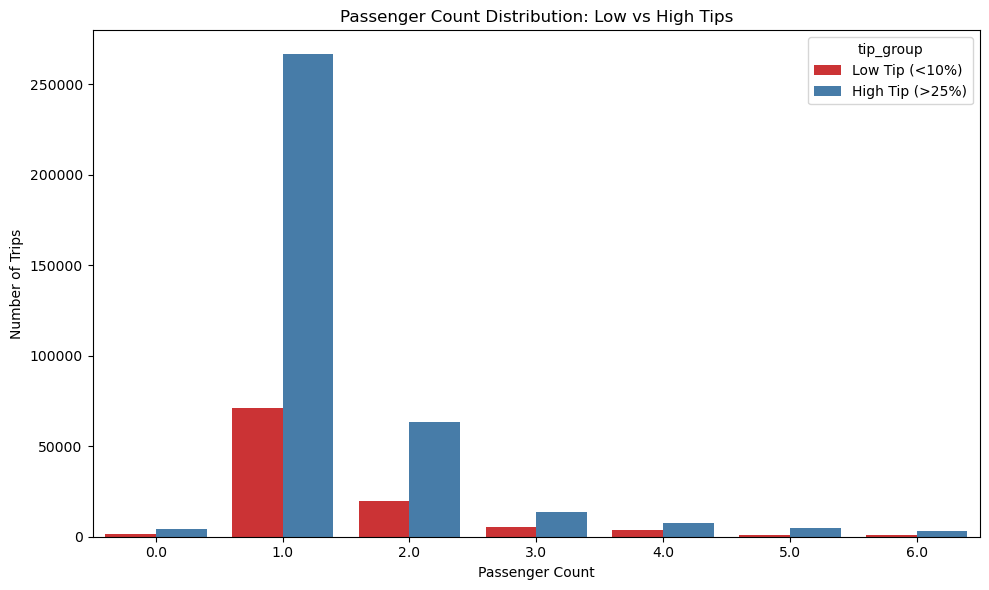

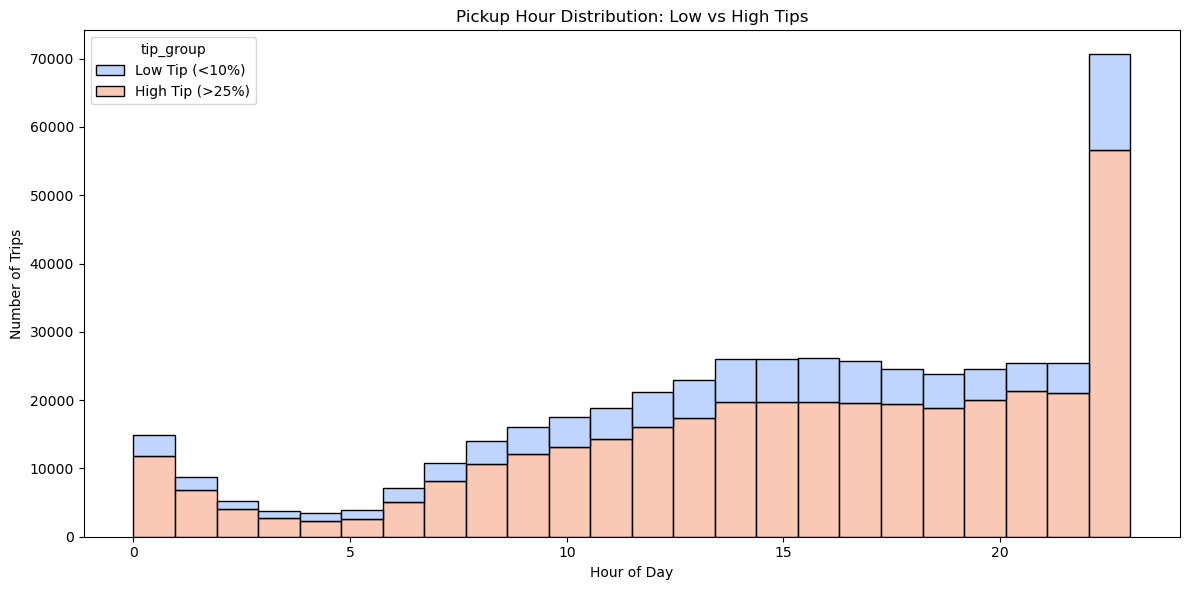

In [616]:
# See how passenger count varies across hours and days
# Filter and safely copy the DataFrame
df_filtered = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()

# Calculate tip percentage safely
df_filtered.loc[:, 'tip_percent'] = (df_filtered['tip_amount'] / df_filtered['fare_amount']) * 100

# Create low and high tip datasets
low_tips = df_filtered[df_filtered['tip_percent'] < 10].copy()
high_tips = df_filtered[df_filtered['tip_percent'] > 25].copy()

# Add labels
low_tips.loc[:, 'tip_group'] = 'Low Tip (<10%)'
high_tips.loc[:, 'tip_group'] = 'High Tip (>25%)'

# Combine datasets
tip_comparison = pd.concat([low_tips, high_tips])

# Plot 1: Trip Distance comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=tip_comparison, x='tip_group', y='trip_distance', hue='tip_group', legend=False, palette='Set2')
plt.title('Trip Distance for Low vs High Tips')
plt.xlabel('')
plt.ylabel('Trip Distance (miles)')
plt.tight_layout()
plt.show()

# Plot 2: Fare Amount comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=tip_comparison, x='tip_group', y='fare_amount', hue='tip_group', legend=False, palette='Set3')
plt.title('Fare Amount for Low vs High Tips')
plt.xlabel('')
plt.ylabel('Fare Amount ($)')
plt.tight_layout()
plt.show()

# Plot 3: Passenger Count comparison
plt.figure(figsize=(10, 6))
sns.countplot(data=tip_comparison, x='passenger_count', hue='tip_group', palette='Set1')
plt.title('Passenger Count Distribution: Low vs High Tips')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

# Plot 4: Hour of Pickup comparison
tip_comparison.loc[:, 'hour'] = tip_comparison['tpep_pickup_datetime'].dt.hour
plt.figure(figsize=(12, 6))
sns.histplot(data=tip_comparison, x='hour', hue='tip_group', multiple='stack', bins=24, palette='coolwarm')
plt.title('Pickup Hour Distribution: Low vs High Tips')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

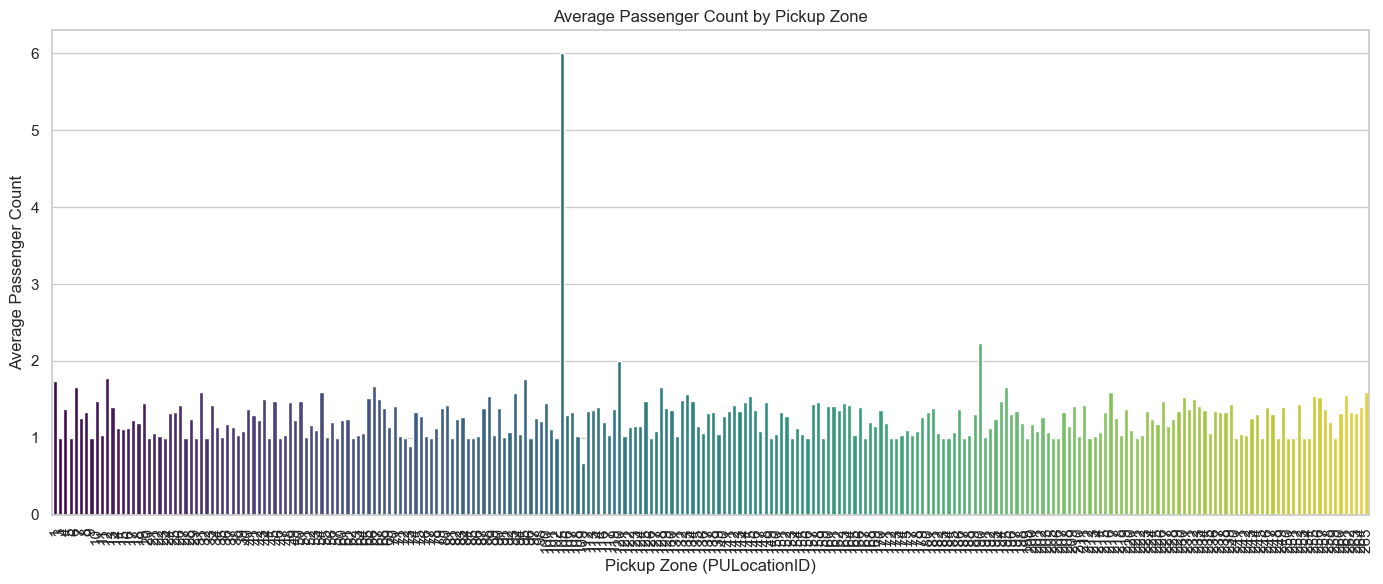

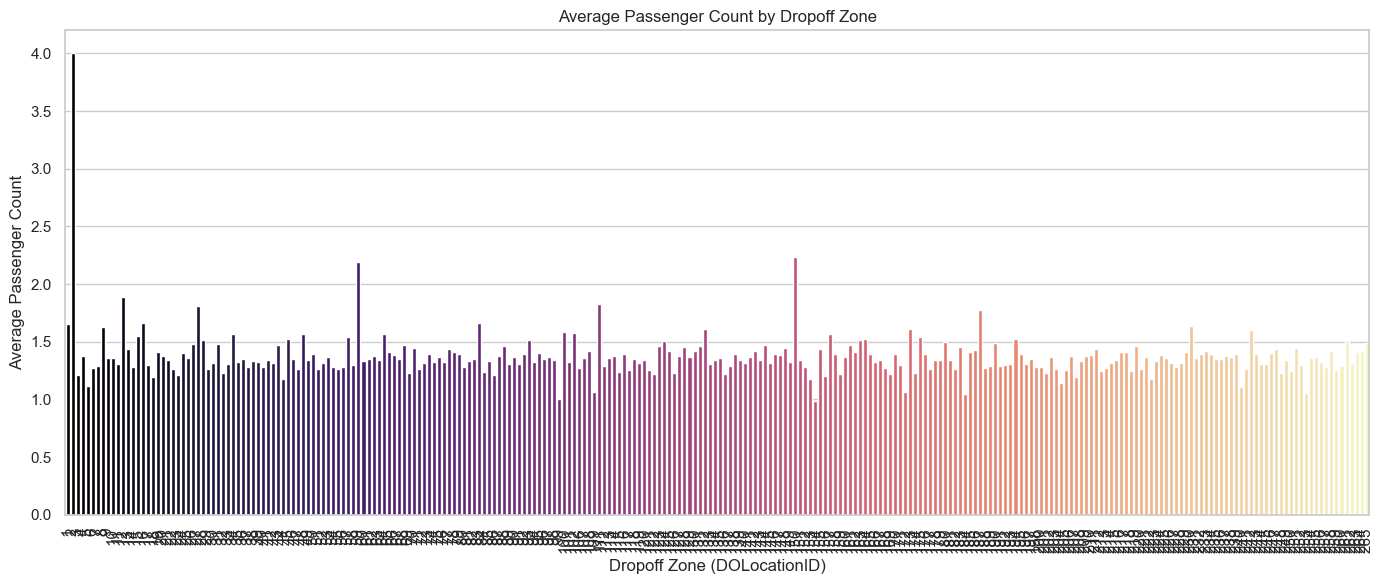

In [622]:
# How does passenger count vary across zones
avg_passenger_by_pickup = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_pickup = avg_passenger_by_pickup.sort_values(by='passenger_count', ascending=False)

avg_passenger_by_dropoff = df.groupby('DOLocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_dropoff = avg_passenger_by_dropoff.sort_values(by='passenger_count', ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
sns.barplot(data=avg_passenger_by_pickup, x='PULocationID', y='passenger_count', hue='PULocationID', dodge=False, palette='viridis')
plt.title('Average Passenger Count by Pickup Zone')
plt.xlabel('Pickup Zone (PULocationID)')
plt.ylabel('Average Passenger Count')
plt.legend([], [], frameon=False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=avg_passenger_by_dropoff, x='DOLocationID', y='passenger_count', hue='DOLocationID', dodge=False, palette='magma')
plt.title('Average Passenger Count by Dropoff Zone')
plt.xlabel('Dropoff Zone (DOLocationID)')
plt.ylabel('Average Passenger Count')
plt.legend([], [], frameon=False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


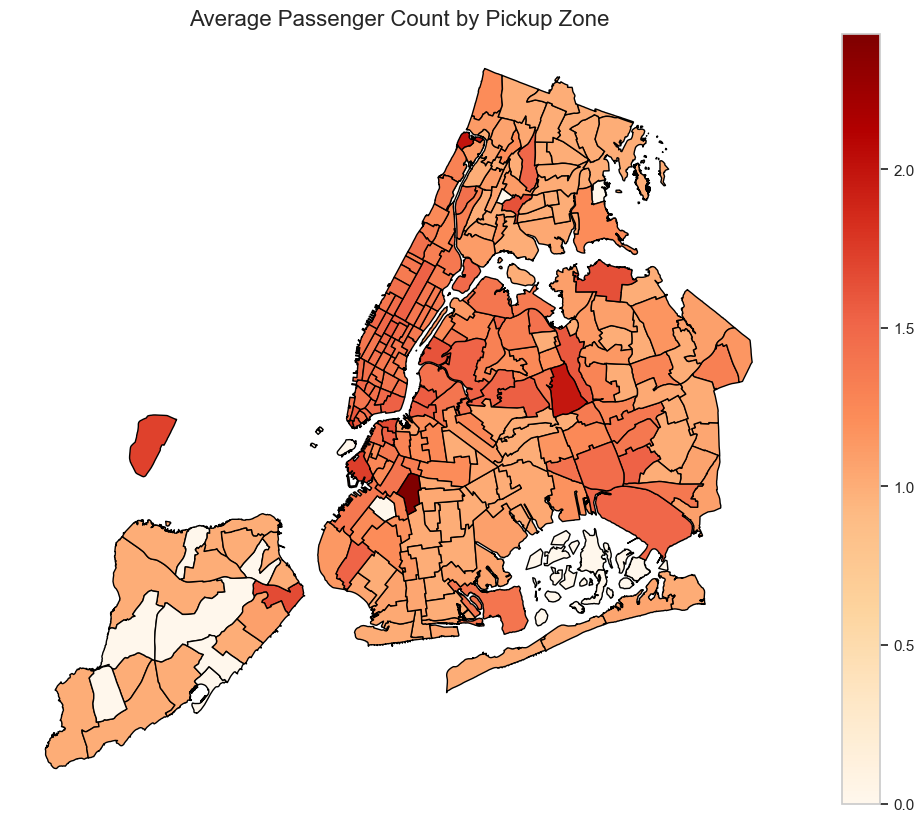

In [636]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_pickup = df_filtered.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_pickup.columns = ['LocationID', 'avg_passenger_count']

zones_with_trips = zones.merge(avg_passenger_by_pickup, how='left', on='LocationID')

zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
zones_with_trips.plot(column='avg_passenger_count', ax=ax, legend=True,
                      cmap='OrRd', edgecolor='black')
plt.title('Average Passenger Count by Pickup Zone', fontsize=16)
plt.axis('off')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

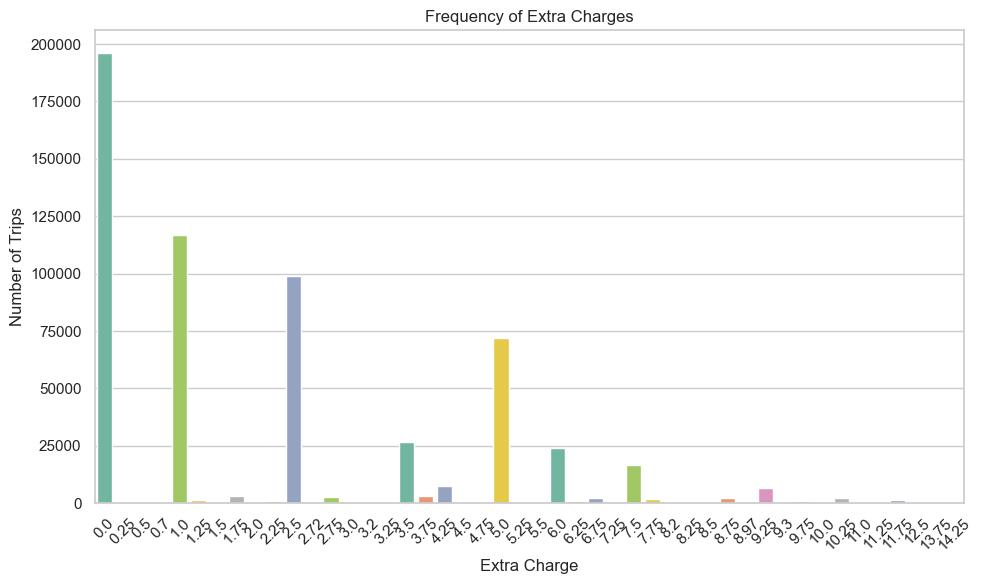

In [642]:
# How often is each surcharge applied?

df_filtered = df[df['extra'].notnull()].copy()

extra_counts = df_filtered['extra'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=extra_counts.index, y=extra_counts.values, hue=extra_counts.index, palette="Set2", legend=False)
plt.title("Frequency of Extra Charges")
plt.xlabel("Extra Charge")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.